In [ ]:
import pandas as pd
import numpy as np
from sklearn.tree import ExtraTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from imblearn.over_sampling import SMOTE
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
df=pd.read_csv('/content/drive/MyDrive/MUSCULOSKELETAL HEALTH/MUSCULOSKELETAL HEALTH - Sheet1.csv')
df2=pd.read_csv('/content/drive/MyDrive/Test_data_version1.xlsx - Sheet1.csv')


df_test = df[df['Patient_ID'].isin(df2['Patient_ID'])].reset_index(drop=True)

In [ ]:
df

,Patient_ID,MYALGIAS/ MUSCLE ATROPHY,OSTEOARTHRITIS,OSTEOPOROSIS
0,KHAIGHGPTTL155,5.712342e+08,3.739306e+07,1.152345e+09
1,KHAIGHGPTTL156,1.251631e+09,9.220119e+04,8.085465e+08
2,KHAIGHGPTTL157,6.028514e+08,2.764356e+05,9.785774e+08
3,KHAIGHGPTTL158,9.028730e+08,1.843184e+05,8.086463e+08
4,KHAIGHGPTTL159,6.047848e+08,2.763516e+05,1.175862e+09
...,...,...,...,...
2145,KHTRCLGPTTL52,1.984048e+09,2.430838e+08,1.429600e+09
2146,KHYUNQGPTTL10,1.851188e+08,0.000000e+00,3.647334e+08
2147,KHYUNQGPTTL11,1.831921e+08,4.610059e+04,6.262528e+08
2148,KHAIGPRX1340,1.504679e+06,0.000000e+00,2.499629e+08


In [ ]:
df2

,Patient_ID,Diabetes,High Blood pressure,Coronary Artery Disease,Arrhythmia,"Heart Failure- Dilated Cardiomyopathy, Restrictive Cardiomyopathy",Cholesterol disorders,Hypertriglyceridemia,"Thyroid Disorders- Hypothyroidism, Hyperthyroidism","Anemia- Microcytic, Hemolytic",...,Fatigue,"Mood Disorders- Anxiety, Schizophrenia, Depression",Urticaria,Essential tremors,Renal Disorders,"Sinusitis, Dust Allergy (Ciliary dykinesia, Hyper IgE syndrome, Angioedma, Chroinc granulomatous)",Obesity,Skin Health,Eye Health,Gastritis
0,KHAIGHGPPGX19,Moderate to High,Mild,-,-,-,Mild,Moderate,0,0,...,-,0,-,-,-,-,Mild,-,-,Mild
1,KHAIGHGPPGX22,Mild,Moderate,Mild,-,-,Moderate,Mild,Mild,0,...,-,0,-,-,-,-,Mild,-,-,Mild
2,KHAIGHGPTTL318,Mild to Moderate,Mild,Mild,-,-,Mild,Mild,Low to Mild,0,...,-,0,-,-,-,-,Low to Mild,-,-,Moderate
3,KHAIGHGPTTL319,Mild to Moderate,Mild to Moderate,Mild,-,-,Moderate,Moderate,Low to Mild,0,...,-,0,-,-,-,-,Moderate,-,-,Moderate
4,KHAIGHGPTTL321,Moderate to High,Mild,Mild,-,-,Mild to Moderate,Mild to Moderate,Low to Mild,0,...,-,0,-,-,-,-,Mild to Moderate,-,-,Mild
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
495,KHAIGHGPTTL546,Mild,Mild,Mild,-,-,Mild,Moderate,0,0,...,-,Moderate,-,-,-,-,0,-,Mild,-
496,KHAIGHGPTTL548,Low,Moderate to High,Mild,-,-,Moderate,Mild,0,0,...,-,Moderate,-,-,-,-,Moderate,-,-,0
497,KHAIGHGPTTL551,Moderate,Mild,Mild,-,-,Moderate,Moderate,Mild,0,...,-,Moderate,-,-,-,-,Mild,-,-,Moderate
498,KHAIGHGPTTL553,Mild,Mild,Mild,-,-,Mild,Mild,Low,0,...,-,Moderate,-,-,-,-,Mild,-,-,Low to Mild


In [ ]:
labels=pd.read_csv('/content/drive/MyDrive/MUSCULOSKELETAL HEALTH/new_labels_musculoskeletal_set1.csv')

In [ ]:
labels['new_labels'].value_counts()

,count
new_labels,
2,2022
1,90
0,30
3,8


# EXTRA TREES

In [ ]:
df_train = labels[~labels['Patient_ID'].isin(df2['Patient_ID'])].reset_index(drop=True)


In [ ]:
df_train_set1=df_train.copy()
df_train_set1=df_train_set1.drop(columns=['Patient_ID','Muscular dystrophy, atrophy'])

In [ ]:
df_train_set1

,MYALGIAS/ MUSCLE ATROPHY,OSTEOARTHRITIS,OSTEOPOROSIS,new_labels
0,5.712342e+08,3.739306e+07,1.152345e+09,2
1,1.251631e+09,9.220119e+04,8.085465e+08,2
2,6.028514e+08,2.764356e+05,9.785774e+08,2
3,9.028730e+08,1.843184e+05,8.086463e+08,2
4,6.047848e+08,2.763516e+05,1.175862e+09,2
...,...,...,...,...
1678,4.270590e+08,3.685527e+05,1.337207e+09,2
1679,2.422735e+08,1.885776e+07,8.768683e+08,2
1680,1.851188e+08,0.000000e+00,3.647334e+08,2
1681,1.504679e+06,0.000000e+00,2.499629e+08,2


In [ ]:
scaler=MinMaxScaler()
smote=SMOTE()
test_split=0.3

In [ ]:
from imblearn.over_sampling import SMOTE
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

# Drop target variable to get feature matrix
X = df_train_set1.drop(columns=['new_labels'])
y = df_train_set1['new_labels']

# Apply SMOTE with a balanced strategy (adjust as needed)
smote = SMOTE(sampling_strategy={0: 100, 1: 200, 2: 2022, 3: 400}, k_neighbors=1)
X_balanced, y_balanced = smote.fit_resample(X, y)

# Split into train and test sets
X_train, X_test, y_train, y_test = train_test_split(
    X_balanced, y_balanced, test_size=test_split, random_state=42, stratify=y_balanced
)

# Feature scaling
scaler = StandardScaler()
X_train_scaled = pd.DataFrame(scaler.fit_transform(X_train), columns=X_train.columns, index=X_train.index)
X_test_scaled = pd.DataFrame(scaler.transform(X_test), columns=X_test.columns, index=X_test.index)


In [ ]:
y_train.value_counts()

,count
new_labels,
2,1415
3,280
1,140
0,70


In [ ]:
x_train_valid=df_train_set1.drop(columns=['new_labels'])
y_train_valid=df_train_set1['new_labels']
x_train_valid_scaled=scaler.transform(x_train_valid)
x_train_valid_scaled=pd.DataFrame(x_train_valid_scaled,columns=x_train_valid.columns,index=x_train_valid.index)

In [ ]:
df_test=labels[labels['Patient_ID'].isin(df2['Patient_ID'])].reset_index(drop=True)

In [ ]:
df_test=df_test.drop(columns=['Patient_ID','Muscular dystrophy, atrophy'])

In [ ]:
x_test_valid=df_test.drop(columns=['new_labels'])
y_test_valid=df_test['new_labels']
x_test_valid_scaled=scaler.transform(x_test_valid)
x_test_valid_scaled=pd.DataFrame(x_test_valid_scaled,columns=x_test_valid.columns,index=x_test_valid.index)


Extra Trees Classifier Metrics:
Accuracy: 0.9914320685434517
Precision: 0.9913807962263576
Recall: 0.9914320685434517
F1-score: 0.991263380803536
Confusion Matrix:
[[ 30   0   0   0]
 [  0  54   6   0]
 [  0   1 606   0]
 [  0   0   0 120]]


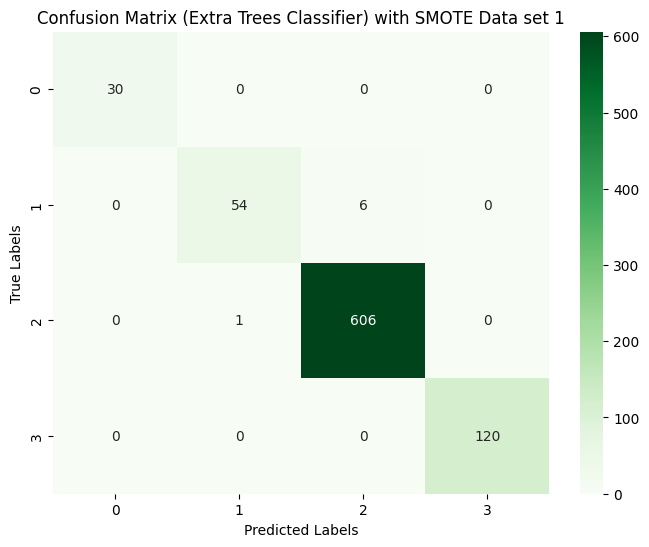

In [ ]:
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

# Extra Trees Classifier
et_classifier = ExtraTreesClassifier(
    n_estimators=200,
    max_depth=None,
    min_samples_split=5,
    random_state=42
)
et_classifier.fit(X_train_scaled, y_train)
y_pred_et = et_classifier.predict(X_test_scaled)

# Evaluate the Extra Trees model
accuracy_et = accuracy_score(y_test, y_pred_et)
precision_et = precision_score(y_test, y_pred_et, average='weighted')
recall_et = recall_score(y_test, y_pred_et, average='weighted')
f1_et = f1_score(y_test, y_pred_et, average='weighted')
conf_matrix_et = confusion_matrix(y_test, y_pred_et)

# Print the evaluation metrics
print("Extra Trees Classifier Metrics:")
print(f"Accuracy: {accuracy_et}")
print(f"Precision: {precision_et}")
print(f"Recall: {recall_et}")
print(f"F1-score: {f1_et}")
print(f"Confusion Matrix:\n{conf_matrix_et}")

# Plot the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix_et, annot=True, fmt="d", cmap="Greens",
            xticklabels=np.unique(y_test), yticklabels=np.unique(y_test))
plt.xlabel("Predicted Labels")
plt.ylabel("True Labels")
plt.title("Confusion Matrix (Extra Trees Classifier) with SMOTE Data set 1")
plt.show()

Accuracy (Extra Trees): 0.995840760546643
Precision (Extra Trees): 0.9957899732157566
Recall (Extra Trees): 0.995840760546643
F1-score (Extra Trees): 0.9957410534115723
Confusion Matrix (Extra Trees):
[[  28    0    0    0]
 [   0   47    6    0]
 [   0    1 1599    0]
 [   0    0    0    2]]


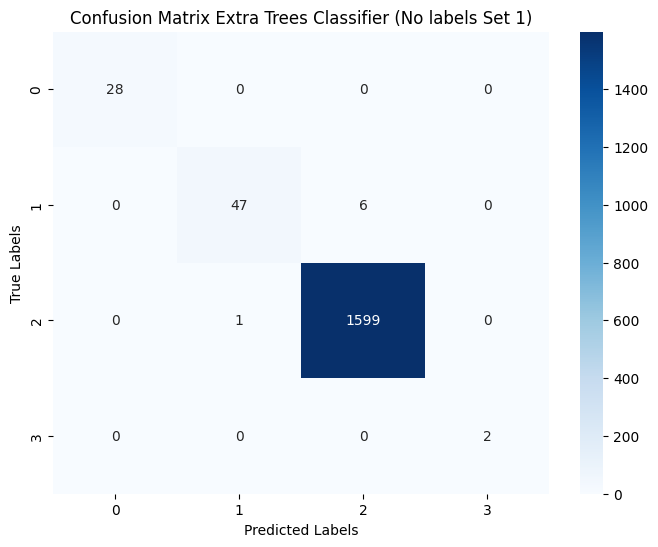

In [ ]:
y_pred_train_et = et_classifier.predict(x_train_valid_scaled)

# Evaluate the model
accuracy_et = accuracy_score(y_train_valid, y_pred_train_et)
precision_et = precision_score(y_train_valid, y_pred_train_et, average='weighted')  # Use 'weighted' for multi-class
recall_et = recall_score(y_train_valid, y_pred_train_et, average='weighted')
f1_et = f1_score(y_train_valid, y_pred_train_et, average='weighted')
conf_matrix_et = confusion_matrix(y_train_valid, y_pred_train_et)

# Print metrics
print(f"Accuracy (Extra Trees): {accuracy_et}")
print(f"Precision (Extra Trees): {precision_et}")
print(f"Recall (Extra Trees): {recall_et}")
print(f"F1-score (Extra Trees): {f1_et}")
print(f"Confusion Matrix (Extra Trees):\n{conf_matrix_et}")

# Plot confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix_et, annot=True, fmt="d", cmap="Blues",
            xticklabels=np.unique(y_train_valid), yticklabels=np.unique(y_train_valid))
plt.xlabel("Predicted Labels")
plt.ylabel("True Labels")
plt.title("Confusion Matrix Extra Trees Classifier (No labels Set 1)")
plt.show()


/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


Accuracy (Extra Trees Test): 0.9207708779443254
Precision (Extra Trees Test): 0.9143095734606
Recall (Extra Trees Test): 0.9207708779443254
F1-score (Extra Trees Test): 0.8937537871698732
Confusion Matrix (Extra Trees Test):
[[  1   0   1   0]
 [  0   7  30   0]
 [  0   0 422   0]
 [  0   0   6   0]]


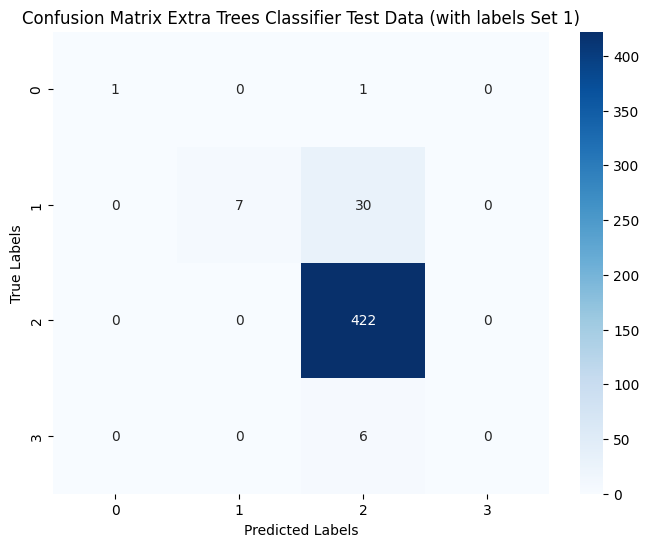

In [ ]:
# Predict on test data
y_pred_test_et = et_classifier.predict(x_test_valid_scaled)

# Evaluate the model on test data
accuracy_et_test = accuracy_score(y_test_valid, y_pred_test_et)
precision_et_test = precision_score(y_test_valid, y_pred_test_et, average='weighted')  # Use 'weighted' for multi-class
recall_et_test = recall_score(y_test_valid, y_pred_test_et, average='weighted')
f1_et_test = f1_score(y_test_valid, y_pred_test_et, average='weighted')
conf_matrix_et_test = confusion_matrix(y_test_valid, y_pred_test_et)

# Print metrics
print(f"Accuracy (Extra Trees Test): {accuracy_et_test}")
print(f"Precision (Extra Trees Test): {precision_et_test}")
print(f"Recall (Extra Trees Test): {recall_et_test}")
print(f"F1-score (Extra Trees Test): {f1_et_test}")
print(f"Confusion Matrix (Extra Trees Test):\n{conf_matrix_et_test}")

# Plot confusion matrix for test data
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix_et_test, annot=True, fmt="d", cmap="Blues",
            xticklabels=np.unique(y_test_valid), yticklabels=np.unique(y_test_valid))
plt.xlabel("Predicted Labels")
plt.ylabel("True Labels")
plt.title("Confusion Matrix Extra Trees Classifier Test Data (with labels Set 1)")
plt.show()


In [ ]:
y_pred_test_et

array([2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 1,

In [ ]:
df_test = df[df['Patient_ID'].isin(df2['Patient_ID'])].reset_index(drop=True)

In [ ]:
df_test

,Patient_ID,MYALGIAS/ MUSCLE ATROPHY,OSTEOARTHRITIS,OSTEOPOROSIS
0,KHAIGHGPTTL318,5.401805e+08,6.080050e+08,9.792386e+08
1,KHAIGHGPTTL319,4.279572e+08,9.211719e+04,1.154876e+09
2,KHAIGHGPTTL321,6.352002e+08,9.211719e+04,7.783474e+08
3,KHAIGHGPTTL348,5.776717e+08,2.428843e+08,1.076883e+09
4,KHAIGHGPTTL350,6.691975e+08,4.740202e+08,1.470514e+09
...,...,...,...,...
462,KHSSRIGPTTL8,2.146963e+08,0.000000e+00,6.266213e+08
463,KHSSRIGPTTL9,2.429180e+08,2.303350e+05,3.512164e+08
464,KHTENTGPTTL15,6.044759e+07,2.429764e+08,1.628411e+09
465,KHTRCLGPTTL52,1.984048e+09,2.430838e+08,1.429600e+09


In [ ]:
# Merge df2 with total_test_org based on 'Patient_ID'
merged_df = df_test.merge(df2[['Patient_ID', 'Muscular dystrophy, atrophy']], on='Patient_ID', how='left')
# Changed 'patient_id' to 'Patient_ID' to match the column name in df2 and total_test_org

# 'merged_df' now contains all columns from total_test_org and an additional 'GALL_BLADDER_DISORDERS' column

In [ ]:
merged_df

,Patient_ID,MYALGIAS/ MUSCLE ATROPHY,OSTEOARTHRITIS,OSTEOPOROSIS,"Muscular dystrophy, atrophy"
0,KHAIGHGPTTL318,5.401805e+08,6.080050e+08,9.792386e+08,Mild to Moderate
1,KHAIGHGPTTL319,4.279572e+08,9.211719e+04,1.154876e+09,-
2,KHAIGHGPTTL321,6.352002e+08,9.211719e+04,7.783474e+08,0
3,KHAIGHGPTTL348,5.776717e+08,2.428843e+08,1.076883e+09,Mild
4,KHAIGHGPTTL350,6.691975e+08,4.740202e+08,1.470514e+09,-
...,...,...,...,...,...
462,KHSSRIGPTTL8,2.146963e+08,0.000000e+00,6.266213e+08,Moderate
463,KHSSRIGPTTL9,2.429180e+08,2.303350e+05,3.512164e+08,-
464,KHTENTGPTTL15,6.044759e+07,2.429764e+08,1.628411e+09,Moderate
465,KHTRCLGPTTL52,1.984048e+09,2.430838e+08,1.429600e+09,Moderate


In [ ]:
labels=pd.read_csv('/content/drive/MyDrive/MUSCULOSKELETAL HEALTH/new_labels_musculoskeletal_set1.csv')

In [ ]:
# Select the required columns from the labels dataset
new_labels_df = labels[['Patient_ID', 'new_labels']]

# Merge the new_labels column with merge_df on patient_id
final_merged_df = merged_df.merge(new_labels_df, on='Patient_ID', how='inner')

# Display the first few rows of the final merged DataFrame
print(final_merged_df.head())


       Patient_ID  MYALGIAS/ MUSCLE ATROPHY  OSTEOARTHRITIS  OSTEOPOROSIS  \
0  KHAIGHGPTTL318               540180531.8    6.080050e+08  9.792386e+08   
1  KHAIGHGPTTL319               427957212.1    9.211719e+04  1.154876e+09   
2  KHAIGHGPTTL321               635200228.3    9.211719e+04  7.783474e+08   
3  KHAIGHGPTTL348               577671732.7    2.428843e+08  1.076883e+09   
4  KHAIGHGPTTL350               669197497.6    4.740202e+08  1.470514e+09   

  Muscular dystrophy, atrophy  new_labels  
0            Mild to Moderate           2  
1                           -           2  
2                           0           2  
3                        Mild           1  
4                           -           2  


In [ ]:
merged_df

,Patient_ID,MYALGIAS/ MUSCLE ATROPHY,OSTEOARTHRITIS,OSTEOPOROSIS,"Muscular dystrophy, atrophy"
0,KHAIGHGPTTL318,5.401805e+08,6.080050e+08,9.792386e+08,Mild to Moderate
1,KHAIGHGPTTL319,4.279572e+08,9.211719e+04,1.154876e+09,-
2,KHAIGHGPTTL321,6.352002e+08,9.211719e+04,7.783474e+08,0
3,KHAIGHGPTTL348,5.776717e+08,2.428843e+08,1.076883e+09,Mild
4,KHAIGHGPTTL350,6.691975e+08,4.740202e+08,1.470514e+09,-
...,...,...,...,...,...
462,KHSSRIGPTTL8,2.146963e+08,0.000000e+00,6.266213e+08,Moderate
463,KHSSRIGPTTL9,2.429180e+08,2.303350e+05,3.512164e+08,-
464,KHTENTGPTTL15,6.044759e+07,2.429764e+08,1.628411e+09,Moderate
465,KHTRCLGPTTL52,1.984048e+09,2.430838e+08,1.429600e+09,Moderate


In [ ]:
import pandas as pd

# Convert the array into a DataFrame
y_pred_test_et_df = pd.DataFrame({
    'predicted_labels_et': y_pred_test_et  # Array of predictions
})

# Reset the index of both DataFrames to align the rows
final_merged_df = final_merged_df.reset_index(drop=True)
y_pred_test_et_df = y_pred_test_et_df.reset_index(drop=True)

# Concatenate the DataFrame with the predictions
final_merged_EXTRA_TREES_set1= pd.concat([final_merged_df, y_pred_test_et_df], axis=1)

# Display the first few rows of the updated DataFrame
print(final_merged_EXTRA_TREES_set1.head())


       Patient_ID  MYALGIAS/ MUSCLE ATROPHY  OSTEOARTHRITIS  OSTEOPOROSIS  \
0  KHAIGHGPTTL318               540180531.8    6.080050e+08  9.792386e+08   
1  KHAIGHGPTTL319               427957212.1    9.211719e+04  1.154876e+09   
2  KHAIGHGPTTL321               635200228.3    9.211719e+04  7.783474e+08   
3  KHAIGHGPTTL348               577671732.7    2.428843e+08  1.076883e+09   
4  KHAIGHGPTTL350               669197497.6    4.740202e+08  1.470514e+09   

  Muscular dystrophy, atrophy  new_labels  predicted_labels_et  
0            Mild to Moderate           2                    2  
1                           -           2                    2  
2                           0           2                    2  
3                        Mild           1                    2  
4                           -           2                    2  


In [ ]:
final_merged_EXTRA_TREES_set1

,Patient_ID,MYALGIAS/ MUSCLE ATROPHY,OSTEOARTHRITIS,OSTEOPOROSIS,"Muscular dystrophy, atrophy",new_labels,predicted_labels_et
0,KHAIGHGPTTL318,5.401805e+08,6.080050e+08,9.792386e+08,Mild to Moderate,2,2
1,KHAIGHGPTTL319,4.279572e+08,9.211719e+04,1.154876e+09,-,2,2
2,KHAIGHGPTTL321,6.352002e+08,9.211719e+04,7.783474e+08,0,2,2
3,KHAIGHGPTTL348,5.776717e+08,2.428843e+08,1.076883e+09,Mild,1,2
4,KHAIGHGPTTL350,6.691975e+08,4.740202e+08,1.470514e+09,-,2,2
...,...,...,...,...,...,...,...
462,KHSSRIGPTTL8,2.146963e+08,0.000000e+00,6.266213e+08,Moderate,2,2
463,KHSSRIGPTTL9,2.429180e+08,2.303350e+05,3.512164e+08,-,2,2
464,KHTENTGPTTL15,6.044759e+07,2.429764e+08,1.628411e+09,Moderate,2,2
465,KHTRCLGPTTL52,1.984048e+09,2.430838e+08,1.429600e+09,Moderate,2,2


In [ ]:
# final_merged_EXTRA_TREES_set1.to_csv('/content/drive/MyDrive/MUSCULOSKELETAL HEALTH/final_merged_EXTRA_TREES_musculoskeletal_set1.csv', index=False)

# Grdient Boosting

In [ ]:
df_test = df[df['Patient_ID'].isin(df2['Patient_ID'])].reset_index(drop=True)

In [ ]:
labels=pd.read_csv('/content/drive/MyDrive/MUSCULOSKELETAL HEALTH/new_labels_musculoskeletal_set1.csv')

In [ ]:
df_train = labels[~labels['Patient_ID'].isin(df2['Patient_ID'])].reset_index(drop=True)


In [ ]:
df_train_set1=df_train.copy()
df_train_set1=df_train_set1.drop(columns=['Patient_ID','Muscular dystrophy, atrophy'])

In [ ]:
scaler=MinMaxScaler()
smote=SMOTE()
test_split=0.2

In [ ]:
X = df_train_set1.drop(columns=['new_labels'])
y = df_train_set1['new_labels']
smote = SMOTE(k_neighbors=1) # Change k_neighbors to 1 or 2

X_balanced, y_balanced = smote.fit_resample(X, y)
X_train, X_test, y_train, y_test = train_test_split(
    X_balanced, y_balanced, test_size=test_split, random_state=42, stratify=y_balanced
)
X_train_scaled = scaler.fit_transform(X_train)
X_train_scaled = pd.DataFrame(X_train_scaled, columns=X_train.columns, index=X_train.index)
X_test_scaled = scaler.transform(X_test)
X_test_scaled = pd.DataFrame(X_test_scaled, columns=X_test.columns, index=X_test.index)

In [ ]:
x_train_valid=df_train_set1.drop(columns=['new_labels'])
y_train_valid=df_train_set1['new_labels']
x_train_valid_scaled=scaler.transform(x_train_valid)
x_train_valid_scaled=pd.DataFrame(x_train_valid_scaled,columns=x_train_valid.columns,index=x_train_valid.index)

In [ ]:
df_test=labels[labels['Patient_ID'].isin(df2['Patient_ID'])].reset_index(drop=True)

In [1]:
df_test=df_test.drop(columns=['Patient_ID','Muscular dystrophy, atrophy'])

NameError: name 'df_test' is not defined

In [ ]:
x_test_valid=df_test.drop(columns=['new_labels'])
y_test_valid=df_test['new_labels']
x_test_valid_scaled=scaler.transform(x_test_valid)
x_test_valid_scaled=pd.DataFrame(x_test_valid_scaled,columns=x_test_valid.columns,index=x_test_valid.index)


Gradient Boosting Classifier Metrics:
Accuracy: 0.99765625
Precision: 0.9976562347410619
Recall: 0.99765625
F1-score: 0.9976550254791882
Confusion Matrix:
[[320   0   0   0]
 [  0 319   1   0]
 [  1   1 318   0]
 [  0   0   0 320]]


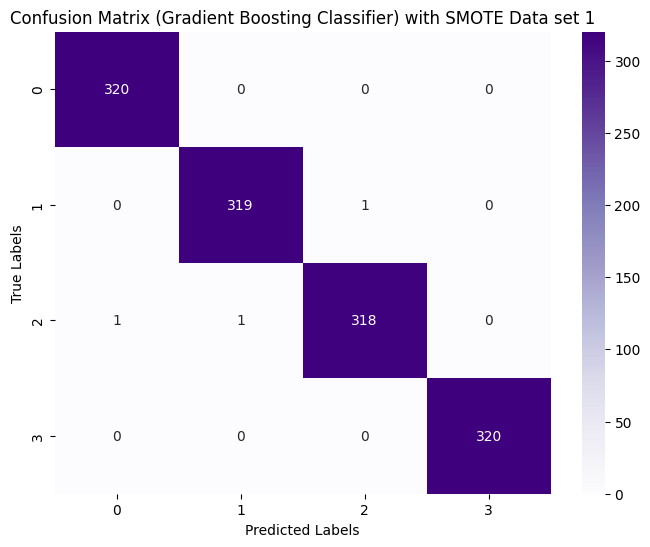

In [ ]:
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

# Gradient Boosting Classifier
gb_classifier = GradientBoostingClassifier(
    n_estimators=400,
    learning_rate=0.4,
    max_depth=7,
    random_state=42
)

# Train the classifier
gb_classifier.fit(X_train_scaled, y_train)

# Predict
y_pred_gb = gb_classifier.predict(X_test_scaled)

# Evaluate the model
accuracy_gb = accuracy_score(y_test, y_pred_gb)
precision_gb = precision_score(y_test, y_pred_gb, average='weighted')
recall_gb = recall_score(y_test, y_pred_gb, average='weighted')
f1_gb = f1_score(y_test, y_pred_gb, average='weighted')
conf_matrix_gb = confusion_matrix(y_test, y_pred_gb)

# Print the evaluation metrics
print("Gradient Boosting Classifier Metrics:")
print(f"Accuracy: {accuracy_gb}")
print(f"Precision: {precision_gb}")
print(f"Recall: {recall_gb}")
print(f"F1-score: {f1_gb}")
print(f"Confusion Matrix:\n{conf_matrix_gb}")

# Plot the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix_gb, annot=True, fmt="d", cmap="Purples",
            xticklabels=np.unique(y_test), yticklabels=np.unique(y_test))
plt.xlabel("Predicted Labels")
plt.ylabel("True Labels")
plt.title("Confusion Matrix (Gradient Boosting Classifier) with SMOTE Data set 1")
plt.show()


Accuracy (Gradient Boosting): 0.9982174688057041
Precision (Gradient Boosting): 0.9982375860770952
Recall (Gradient Boosting): 0.9982174688057041
F1-score (Gradient Boosting): 0.9982224022776556
Confusion Matrix (Gradient Boosting):
[[  28    0    0    0]
 [   0   52    1    0]
 [   1    1 1598    0]
 [   0    0    0    2]]


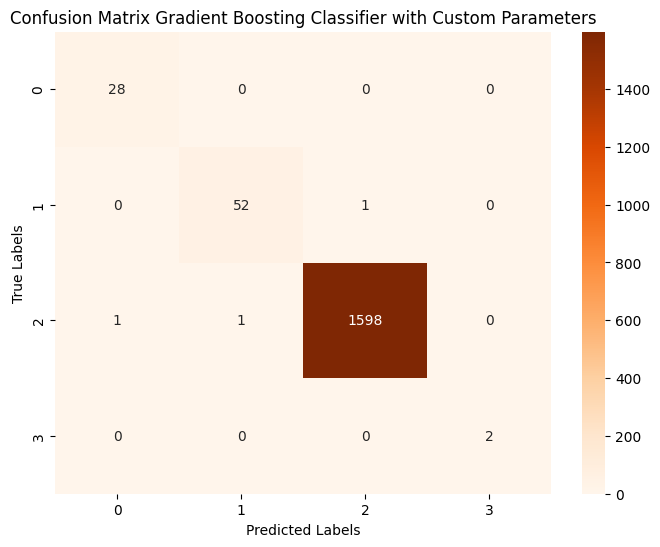

In [ ]:

# Predict on training data
y_pred_train_gb = gb_classifier.predict(x_train_valid_scaled)

# Evaluate the model
accuracy_gb = accuracy_score(y_train_valid, y_pred_train_gb)
precision_gb = precision_score(y_train_valid, y_pred_train_gb, average='weighted')  # Use 'weighted' for multi-class
recall_gb = recall_score(y_train_valid, y_pred_train_gb, average='weighted')
f1_gb = f1_score(y_train_valid, y_pred_train_gb, average='weighted')
conf_matrix_gb = confusion_matrix(y_train_valid, y_pred_train_gb)

# Print metrics
print(f"Accuracy (Gradient Boosting): {accuracy_gb}")
print(f"Precision (Gradient Boosting): {precision_gb}")
print(f"Recall (Gradient Boosting): {recall_gb}")
print(f"F1-score (Gradient Boosting): {f1_gb}")
print(f"Confusion Matrix (Gradient Boosting):\n{conf_matrix_gb}")

# Plot confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix_gb, annot=True, fmt="d", cmap="Oranges",
            xticklabels=np.unique(y_train_valid), yticklabels=np.unique(y_train_valid))
plt.xlabel("Predicted Labels")
plt.ylabel("True Labels")
plt.title("Confusion Matrix Gradient Boosting Classifier with Custom Parameters")
plt.show()

/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


Accuracy (Gradient Boosting Test): 0.9122055674518201
Precision (Gradient Boosting Test): 0.8932076251134067
Recall (Gradient Boosting Test): 0.9122055674518201
F1-score (Gradient Boosting Test): 0.8872210905112465
Confusion Matrix (Gradient Boosting Test):
[[  1   0   1   0]
 [  0   7  30   0]
 [  2   2 418   0]
 [  0   0   6   0]]


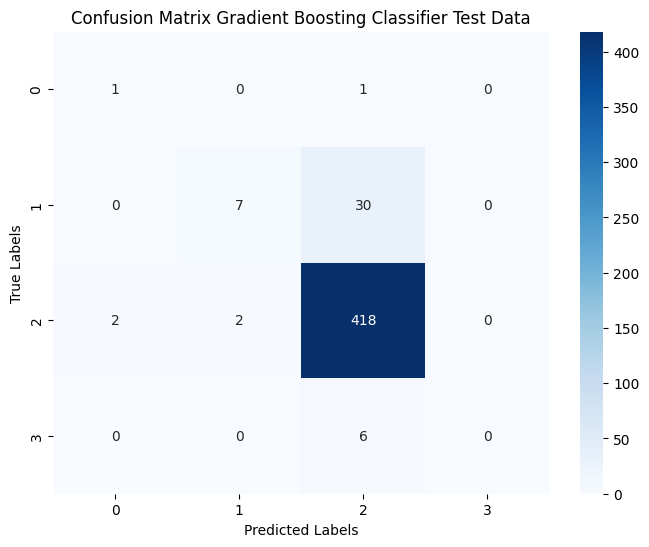

In [ ]:
y_pred_test_gb = gb_classifier.predict(x_test_valid_scaled)

# Evaluate the model on test data
accuracy_gb_test = accuracy_score(y_test_valid, y_pred_test_gb)
precision_gb_test = precision_score(y_test_valid, y_pred_test_gb, average='weighted')  # Use 'weighted' for multi-class
recall_gb_test = recall_score(y_test_valid, y_pred_test_gb, average='weighted')
f1_gb_test = f1_score(y_test_valid, y_pred_test_gb, average='weighted')
conf_matrix_gb_test = confusion_matrix(y_test_valid, y_pred_test_gb)

# Print metrics
print(f"Accuracy (Gradient Boosting Test): {accuracy_gb_test}")
print(f"Precision (Gradient Boosting Test): {precision_gb_test}")
print(f"Recall (Gradient Boosting Test): {recall_gb_test}")
print(f"F1-score (Gradient Boosting Test): {f1_gb_test}")
print(f"Confusion Matrix (Gradient Boosting Test):\n{conf_matrix_gb_test}")

# Plot confusion matrix for test data
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix_gb_test, annot=True, fmt="d", cmap="Blues",
            xticklabels=np.unique(y_test_valid), yticklabels=np.unique(y_test_valid))
plt.xlabel("Predicted Labels")
plt.ylabel("True Labels")
plt.title("Confusion Matrix Gradient Boosting Classifier Test Data")
plt.show()

In [ ]:
 y_pred_test_gb

array([2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 0, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 1, 2, 2, 2, 2, 2, 2, 2, 2, 1,

In [ ]:
final_merged_GB_set1=final_merged_EXTRA_TREES_set1.copy()

In [ ]:
final_merged_GB_set1=final_merged_GB_set1.drop(columns=['predicted_labels_et'])

In [ ]:
final_merged_GB_set1

,Patient_ID,MYALGIAS/ MUSCLE ATROPHY,OSTEOARTHRITIS,OSTEOPOROSIS,"Muscular dystrophy, atrophy",new_labels
0,KHAIGHGPTTL318,5.401805e+08,6.080050e+08,9.792386e+08,Mild to Moderate,2
1,KHAIGHGPTTL319,4.279572e+08,9.211719e+04,1.154876e+09,-,2
2,KHAIGHGPTTL321,6.352002e+08,9.211719e+04,7.783474e+08,0,2
3,KHAIGHGPTTL348,5.776717e+08,2.428843e+08,1.076883e+09,Mild,1
4,KHAIGHGPTTL350,6.691975e+08,4.740202e+08,1.470514e+09,-,2
...,...,...,...,...,...,...
462,KHSSRIGPTTL8,2.146963e+08,0.000000e+00,6.266213e+08,Moderate,2
463,KHSSRIGPTTL9,2.429180e+08,2.303350e+05,3.512164e+08,-,2
464,KHTENTGPTTL15,6.044759e+07,2.429764e+08,1.628411e+09,Moderate,2
465,KHTRCLGPTTL52,1.984048e+09,2.430838e+08,1.429600e+09,Moderate,2


In [ ]:
import pandas as pd

# Convert y_pred_test_lgbm (array) into a DataFrame
# Assuming 'patient_id' exists in final_merged_LightGBM_set1 for proper alignment
y_pred_test_gb_df = pd.DataFrame({
    'y_pred_test_gb': y_pred_test_gb  # Array of predictions
})

# Merge the predictions DataFrame with final_merged_LightGBM_set1
# If no specific key like 'patient_id' is required for the merge, use reset_index for alignment
final_merged_GB_set1 = final_merged_GB_set1.reset_index(drop=True)
y_pred_test_gb_df=y_pred_test_gb_df.reset_index(drop=True)

# Concatenate the predictions with the original DataFrame
final_merged_GB_set1 = pd.concat([final_merged_GB_set1, y_pred_test_gb_df], axis=1)

# Display the first few rows of the updated DataFrame
print(final_merged_GB_set1.head())


       Patient_ID  MYALGIAS/ MUSCLE ATROPHY  OSTEOARTHRITIS  OSTEOPOROSIS  \
0  KHAIGHGPTTL318               540180531.8    6.080050e+08  9.792386e+08   
1  KHAIGHGPTTL319               427957212.1    9.211719e+04  1.154876e+09   
2  KHAIGHGPTTL321               635200228.3    9.211719e+04  7.783474e+08   
3  KHAIGHGPTTL348               577671732.7    2.428843e+08  1.076883e+09   
4  KHAIGHGPTTL350               669197497.6    4.740202e+08  1.470514e+09   

  Muscular dystrophy, atrophy  new_labels  y_pred_test_gb  
0            Mild to Moderate           2               2  
1                           -           2               2  
2                           0           2               2  
3                        Mild           1               2  
4                           -           2               2  


In [ ]:
final_merged_GB_set1

,Patient_ID,MYALGIAS/ MUSCLE ATROPHY,OSTEOARTHRITIS,OSTEOPOROSIS,"Muscular dystrophy, atrophy",new_labels,y_pred_test_gb
0,KHAIGHGPTTL318,5.401805e+08,6.080050e+08,9.792386e+08,Mild to Moderate,2,2
1,KHAIGHGPTTL319,4.279572e+08,9.211719e+04,1.154876e+09,-,2,2
2,KHAIGHGPTTL321,6.352002e+08,9.211719e+04,7.783474e+08,0,2,2
3,KHAIGHGPTTL348,5.776717e+08,2.428843e+08,1.076883e+09,Mild,1,2
4,KHAIGHGPTTL350,6.691975e+08,4.740202e+08,1.470514e+09,-,2,2
...,...,...,...,...,...,...,...
462,KHSSRIGPTTL8,2.146963e+08,0.000000e+00,6.266213e+08,Moderate,2,2
463,KHSSRIGPTTL9,2.429180e+08,2.303350e+05,3.512164e+08,-,2,2
464,KHTENTGPTTL15,6.044759e+07,2.429764e+08,1.628411e+09,Moderate,2,2
465,KHTRCLGPTTL52,1.984048e+09,2.430838e+08,1.429600e+09,Moderate,2,2


In [ ]:
# final_merged_GB_set1.to_csv('/content/drive/MyDrive/MUSCULOSKELETAL HEALTH/final_merged_GB_musculoskeletal_set1.csv', index=False)


# LIGHTGBM

In [ ]:
df_test = df[df['Patient_ID'].isin(df2['Patient_ID'])].reset_index(drop=True)

In [ ]:
labels=pd.read_csv('/content/drive/MyDrive/MUSCULOSKELETAL HEALTH/new_labels_musculoskeletal_set1.csv')

In [ ]:
df_train = labels[~labels['Patient_ID'].isin(df2['Patient_ID'])].reset_index(drop=True)


In [ ]:
df_train_set1=df_train.copy()
df_train_set1=df_train_set1.drop(columns=['Patient_ID','Muscular dystrophy, atrophy'])

In [ ]:
scaler=MinMaxScaler()
smote=SMOTE()
test_split=0.2

In [ ]:
X = df_train_set1.drop(columns=['new_labels'])
y = df_train_set1['new_labels']
smote = SMOTE(k_neighbors=1) # Change k_neighbors to 1 or 2

X_balanced, y_balanced = smote.fit_resample(X, y)
X_train, X_test, y_train, y_test = train_test_split(
    X_balanced, y_balanced, test_size=test_split, random_state=42, stratify=y_balanced
)
X_train_scaled = scaler.fit_transform(X_train)
X_train_scaled = pd.DataFrame(X_train_scaled, columns=X_train.columns, index=X_train.index)
X_test_scaled = scaler.transform(X_test)
X_test_scaled = pd.DataFrame(X_test_scaled, columns=X_test.columns, index=X_test.index)

In [ ]:
x_train_valid=df_train_set1.drop(columns=['new_labels'])
y_train_valid=df_train_set1['new_labels']
x_train_valid_scaled=scaler.transform(x_train_valid)
x_train_valid_scaled=pd.DataFrame(x_train_valid_scaled,columns=x_train_valid.columns,index=x_train_valid.index)

In [ ]:
df_test=labels[labels['Patient_ID'].isin(df2['Patient_ID'])].reset_index(drop=True)

In [ ]:
df_test=df_test.drop(columns=['Patient_ID','Muscular dystrophy, atrophy'])

In [ ]:
x_test_valid=df_test.drop(columns=['new_labels'])
y_test_valid=df_test['new_labels']
x_test_valid_scaled=scaler.transform(x_test_valid)
x_test_valid_scaled=pd.DataFrame(x_test_valid_scaled,columns=x_test_valid.columns,index=x_test_valid.index)


/usr/local/lib/python3.11/dist-packages/dask/dataframe/__init__.py:42: FutureWarning: 
Dask dataframe query planning is disabled because dask-expr is not installed.

You can install it with `pip install dask[dataframe]` or `conda install dask`.
This will raise in a future version.

  warnings.warn(msg, FutureWarning)


[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000685 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 765
[LightGBM] [Info] Number of data points in the train set: 5120, number of used features: 3
[LightGBM] [Info] Start training from score -1.386294
[LightGBM] [Info] Start training from score -1.386294
[LightGBM] [Info] Start training from score -1.386294
[LightGBM] [Info] Start training from score -1.386294
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with

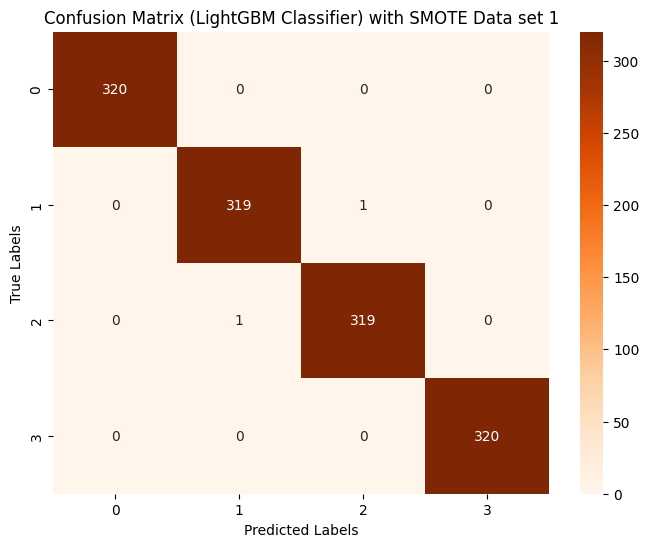

In [ ]:
from lightgbm import LGBMClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

# LightGBM Classifier
lgbm_classifier = LGBMClassifier(
    n_estimators=100,
    learning_rate=0.2,
    max_depth=5,
    random_state=42
)

# Train the classifier
lgbm_classifier.fit(X_train_scaled, y_train)

# Predict
y_pred_lgbm = lgbm_classifier.predict(X_test_scaled)

# Evaluate the model
accuracy_lgbm = accuracy_score(y_test, y_pred_lgbm)
precision_lgbm = precision_score(y_test, y_pred_lgbm, average='weighted')
recall_lgbm = recall_score(y_test, y_pred_lgbm, average='weighted')
f1_lgbm = f1_score(y_test, y_pred_lgbm, average='weighted')
conf_matrix_lgbm = confusion_matrix(y_test, y_pred_lgbm)

# Print the evaluation metrics
print("LightGBM Classifier Metrics:")
print(f"Accuracy: {accuracy_lgbm}")
print(f"Precision: {precision_lgbm}")
print(f"Recall: {recall_lgbm}")
print(f"F1-score: {f1_lgbm}")
print(f"Confusion Matrix:\n{conf_matrix_lgbm}")

# Plot the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix_lgbm, annot=True, fmt="d", cmap="Oranges",
            xticklabels=np.unique(y_test), yticklabels=np.unique(y_test))
plt.xlabel("Predicted Labels")
plt.ylabel("True Labels")
plt.title("Confusion Matrix (LightGBM Classifier) with SMOTE Data set 1")
plt.show()


Accuracy (LightGBM): 0.9988116458704694
Precision (LightGBM): 0.9988116458704694
Recall (LightGBM): 0.9988116458704694
F1-score (LightGBM): 0.9988116458704694
Confusion Matrix (LightGBM):
[[  28    0    0    0]
 [   0   52    1    0]
 [   0    1 1599    0]
 [   0    0    0    2]]


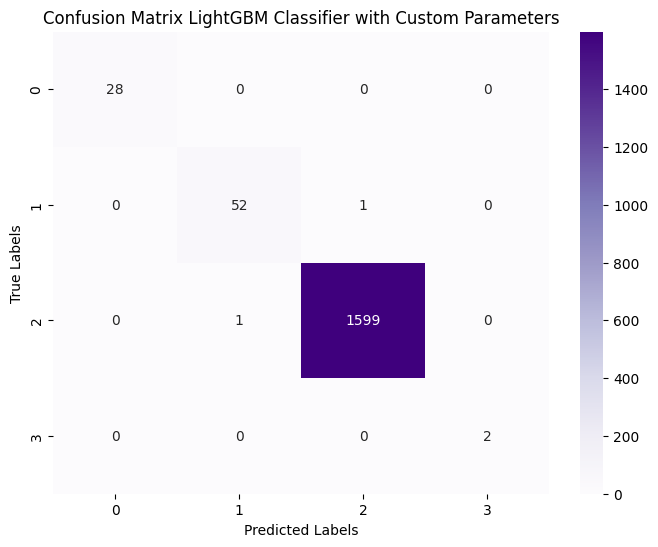

In [ ]:
y_pred_train_lgbm = lgbm_classifier.predict(x_train_valid_scaled)

# Evaluate the model
accuracy_lgbm = accuracy_score(y_train_valid, y_pred_train_lgbm)
precision_lgbm = precision_score(y_train_valid, y_pred_train_lgbm, average='weighted')  # Use 'weighted' for multi-class
recall_lgbm = recall_score(y_train_valid, y_pred_train_lgbm, average='weighted')
f1_lgbm = f1_score(y_train_valid, y_pred_train_lgbm, average='weighted')
conf_matrix_lgbm = confusion_matrix(y_train_valid, y_pred_train_lgbm)

# Print metrics
print(f"Accuracy (LightGBM): {accuracy_lgbm}")
print(f"Precision (LightGBM): {precision_lgbm}")
print(f"Recall (LightGBM): {recall_lgbm}")
print(f"F1-score (LightGBM): {f1_lgbm}")
print(f"Confusion Matrix (LightGBM):\n{conf_matrix_lgbm}")

# Plot confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix_lgbm, annot=True, fmt="d", cmap="Purples",
            xticklabels=np.unique(y_train_valid), yticklabels=np.unique(y_train_valid))
plt.xlabel("Predicted Labels")
plt.ylabel("True Labels")
plt.title("Confusion Matrix LightGBM Classifier with Custom Parameters")
plt.show()


/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


Accuracy (LightGBM Test): 0.9164882226980728
Precision (LightGBM Test): 0.8940472803427836
Recall (LightGBM Test): 0.9164882226980728
F1-score (LightGBM Test): 0.8927203813532768
Confusion Matrix (LightGBM Test):
[[  1   0   1   0]
 [  0   8  29   0]
 [  0   3 419   0]
 [  0   0   6   0]]


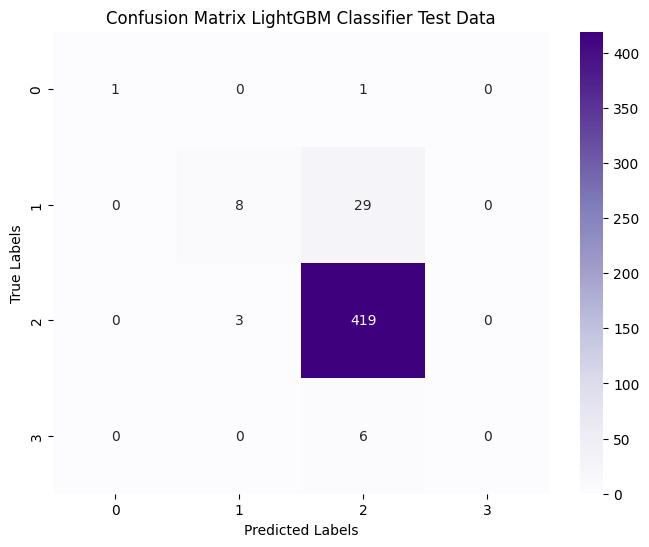

In [ ]:
# # Predict on test data
y_pred_test_lgbm = lgbm_classifier.predict(x_test_valid_scaled)

# Evaluate the model on test data
accuracy_lgbm_test = accuracy_score(y_test_valid, y_pred_test_lgbm)
precision_lgbm_test = precision_score(y_test_valid, y_pred_test_lgbm, average='weighted')  # Use 'weighted' for multi-class
recall_lgbm_test = recall_score(y_test_valid, y_pred_test_lgbm, average='weighted')
f1_lgbm_test = f1_score(y_test_valid, y_pred_test_lgbm, average='weighted')
conf_matrix_lgbm_test = confusion_matrix(y_test_valid, y_pred_test_lgbm)

# Print metrics
print(f"Accuracy (LightGBM Test): {accuracy_lgbm_test}")
print(f"Precision (LightGBM Test): {precision_lgbm_test}")
print(f"Recall (LightGBM Test): {recall_lgbm_test}")
print(f"F1-score (LightGBM Test): {f1_lgbm_test}")
print(f"Confusion Matrix (LightGBM Test):\n{conf_matrix_lgbm_test}")

# Plot confusion matrix for test data
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix_lgbm_test, annot=True, fmt="d", cmap="Purples",
            xticklabels=np.unique(y_test_valid), yticklabels=np.unique(y_test_valid))
plt.xlabel("Predicted Labels")
plt.ylabel("True Labels")
plt.title("Confusion Matrix LightGBM Classifier Test Data")
plt.show()


In [ ]:
y_pred_test_lgbm

array([2, 2, 2, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 1, 2, 2, 2, 2, 2, 2, 2, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 1, 2, 2, 2, 2, 2, 2, 1,

In [ ]:
final_merged_LGBM_set1=final_merged_EXTRA_TREES_set1.copy()

In [ ]:
final_merged_LGBM_set1=final_merged_LGBM_set1.drop(columns=['predicted_labels_et'])

In [ ]:
final_merged_LGBM_set1

,Patient_ID,MYALGIAS/ MUSCLE ATROPHY,OSTEOARTHRITIS,OSTEOPOROSIS,"Muscular dystrophy, atrophy",new_labels
0,KHAIGHGPTTL318,5.401805e+08,6.080050e+08,9.792386e+08,Mild to Moderate,2
1,KHAIGHGPTTL319,4.279572e+08,9.211719e+04,1.154876e+09,-,2
2,KHAIGHGPTTL321,6.352002e+08,9.211719e+04,7.783474e+08,0,2
3,KHAIGHGPTTL348,5.776717e+08,2.428843e+08,1.076883e+09,Mild,1
4,KHAIGHGPTTL350,6.691975e+08,4.740202e+08,1.470514e+09,-,2
...,...,...,...,...,...,...
462,KHSSRIGPTTL8,2.146963e+08,0.000000e+00,6.266213e+08,Moderate,2
463,KHSSRIGPTTL9,2.429180e+08,2.303350e+05,3.512164e+08,-,2
464,KHTENTGPTTL15,6.044759e+07,2.429764e+08,1.628411e+09,Moderate,2
465,KHTRCLGPTTL52,1.984048e+09,2.430838e+08,1.429600e+09,Moderate,2


In [ ]:
import pandas as pd

# Convert y_pred_test_lgbm (array) into a DataFrame
# Assuming 'patient_id' exists in final_merged_LightGBM_set1 for proper alignment
y_pred_test_lgbm_df = pd.DataFrame({
    'y_pred_test_lgbm': y_pred_test_lgbm  # Array of predictions
})

# Merge the predictions DataFrame with final_merged_LightGBM_set1
# If no specific key like 'patient_id' is required for the merge, use reset_index for alignment
final_merged_LGBM_set1 = final_merged_LGBM_set1.reset_index(drop=True)
y_pred_test_lgbm_df=y_pred_test_lgbm_df.reset_index(drop=True)

# Concatenate the predictions with the original DataFrame
final_merged_LGBM_set1 = pd.concat([final_merged_LGBM_set1, y_pred_test_lgbm_df], axis=1)

# Display the first few rows of the updated DataFrame
print(final_merged_LGBM_set1.head())

       Patient_ID  MYALGIAS/ MUSCLE ATROPHY  OSTEOARTHRITIS  OSTEOPOROSIS  \
0  KHAIGHGPTTL318               540180531.8    6.080050e+08  9.792386e+08   
1  KHAIGHGPTTL319               427957212.1    9.211719e+04  1.154876e+09   
2  KHAIGHGPTTL321               635200228.3    9.211719e+04  7.783474e+08   
3  KHAIGHGPTTL348               577671732.7    2.428843e+08  1.076883e+09   
4  KHAIGHGPTTL350               669197497.6    4.740202e+08  1.470514e+09   

  Muscular dystrophy, atrophy  new_labels  y_pred_test_lgbm  
0            Mild to Moderate           2                 2  
1                           -           2                 2  
2                           0           2                 2  
3                        Mild           1                 1  
4                           -           2                 2  


In [ ]:
final_merged_LGBM_set1

,Patient_ID,MYALGIAS/ MUSCLE ATROPHY,OSTEOARTHRITIS,OSTEOPOROSIS,"Muscular dystrophy, atrophy",new_labels,y_pred_test_lgbm
0,KHAIGHGPTTL318,5.401805e+08,6.080050e+08,9.792386e+08,Mild to Moderate,2,2
1,KHAIGHGPTTL319,4.279572e+08,9.211719e+04,1.154876e+09,-,2,2
2,KHAIGHGPTTL321,6.352002e+08,9.211719e+04,7.783474e+08,0,2,2
3,KHAIGHGPTTL348,5.776717e+08,2.428843e+08,1.076883e+09,Mild,1,1
4,KHAIGHGPTTL350,6.691975e+08,4.740202e+08,1.470514e+09,-,2,2
...,...,...,...,...,...,...,...
462,KHSSRIGPTTL8,2.146963e+08,0.000000e+00,6.266213e+08,Moderate,2,2
463,KHSSRIGPTTL9,2.429180e+08,2.303350e+05,3.512164e+08,-,2,2
464,KHTENTGPTTL15,6.044759e+07,2.429764e+08,1.628411e+09,Moderate,2,2
465,KHTRCLGPTTL52,1.984048e+09,2.430838e+08,1.429600e+09,Moderate,2,2


In [ ]:
# final_merged_LGBM_set1.to_csv('/content/drive/MyDrive/MUSCULOSKELETAL HEALTH/final_merged_LGBM_musculoskeletal_set1.csv', index=False)


# RANDOM FOREST

In [ ]:
df_test = df[df['Patient_ID'].isin(df2['Patient_ID'])].reset_index(drop=True)

In [ ]:
labels=pd.read_csv('/content/drive/MyDrive/MUSCULOSKELETAL HEALTH/new_labels_musculoskeletal_set1.csv')

In [ ]:
df_train = labels[~labels['Patient_ID'].isin(df2['Patient_ID'])].reset_index(drop=True)


In [ ]:
df_train_set1=df_train.copy()
df_train_set1=df_train_set1.drop(columns=['Patient_ID','Muscular dystrophy, atrophy'])

In [ ]:
scaler=MinMaxScaler()
smote=SMOTE()
test_split=0.3

In [ ]:
X = df_train_set1.drop(columns=['new_labels'])
y = df_train_set1['new_labels']
smote = SMOTE(k_neighbors=1) # Change k_neighbors to 1 or 2

X_balanced, y_balanced = smote.fit_resample(X, y)
X_train, X_test, y_train, y_test = train_test_split(
    X_balanced, y_balanced, test_size=test_split, random_state=42, stratify=y_balanced
)
X_train_scaled = scaler.fit_transform(X_train)
X_train_scaled = pd.DataFrame(X_train_scaled, columns=X_train.columns, index=X_train.index)
X_test_scaled = scaler.transform(X_test)
X_test_scaled = pd.DataFrame(X_test_scaled, columns=X_test.columns, index=X_test.index)

In [ ]:
x_train_valid=df_train_set1.drop(columns=['new_labels'])
y_train_valid=df_train_set1['new_labels']
x_train_valid_scaled=scaler.transform(x_train_valid)
x_train_valid_scaled=pd.DataFrame(x_train_valid_scaled,columns=x_train_valid.columns,index=x_train_valid.index)

In [ ]:
df_test=labels[labels['Patient_ID'].isin(df2['Patient_ID'])].reset_index(drop=True)

In [ ]:
df_test=df_test.drop(columns=['Patient_ID','Muscular dystrophy, atrophy'])

In [ ]:
x_test_valid=df_test.drop(columns=['new_labels'])
y_test_valid=df_test['new_labels']
x_test_valid_scaled=scaler.transform(x_test_valid)
x_test_valid_scaled=pd.DataFrame(x_test_valid_scaled,columns=x_test_valid.columns,index=x_test_valid.index)


Random Forest Classifier Metrics:
Accuracy: 0.9984375
Precision: 0.9984472049689441
Recall: 0.9984375
F1-score: 0.998437484741062
Confusion Matrix:
[[480   0   0   0]
 [  0 477   3   0]
 [  0   0 480   0]
 [  0   0   0 480]]


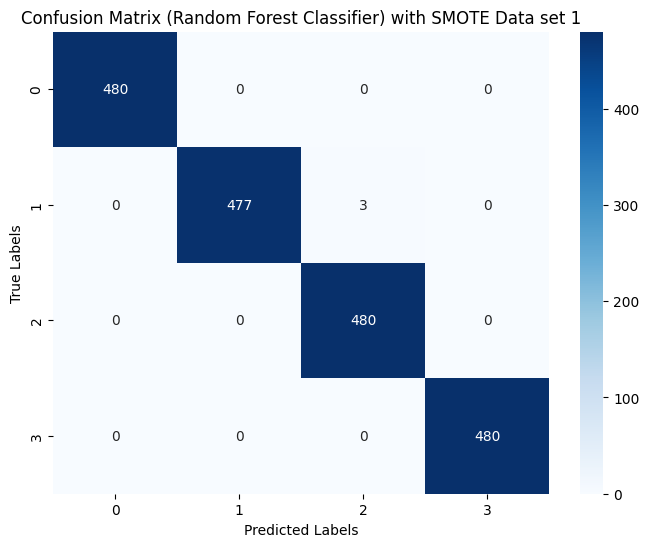

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

# Random Forest Classifier with specified parameters
rf_classifier = RandomForestClassifier(
    n_estimators=100,
    max_depth=10,
    min_samples_split=5,
    random_state=42
)

# Train the classifier
rf_classifier.fit(X_train_scaled, y_train)

# Predict
y_pred_rf = rf_classifier.predict(X_test_scaled)

# Evaluate the model
accuracy_rf = accuracy_score(y_test, y_pred_rf)
precision_rf = precision_score(y_test, y_pred_rf, average='weighted')
recall_rf = recall_score(y_test, y_pred_rf, average='weighted')
f1_rf = f1_score(y_test, y_pred_rf, average='weighted')
conf_matrix_rf = confusion_matrix(y_test, y_pred_rf)

# Print the evaluation metrics
print("Random Forest Classifier Metrics:")
print(f"Accuracy: {accuracy_rf}")
print(f"Precision: {precision_rf}")
print(f"Recall: {recall_rf}")
print(f"F1-score: {f1_rf}")
print(f"Confusion Matrix:\n{conf_matrix_rf}")

# Plot the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix_rf, annot=True, fmt="d", cmap="Blues",
            xticklabels=np.unique(y_test), yticklabels=np.unique(y_test))
plt.xlabel("Predicted Labels")
plt.ylabel("True Labels")
plt.title("Confusion Matrix (Random Forest Classifier) with SMOTE Data set 1")
plt.show()

Accuracy (rf): 0.9952465834818776
Precision (rf): 0.9953523847227878
Recall (rf): 0.9952465834818776
F1-score (rf): 0.995289110226142
Confusion Matrix (rf):
[[  28    0    0    0]
 [   0   50    3    0]
 [   0    5 1595    0]
 [   0    0    0    2]]


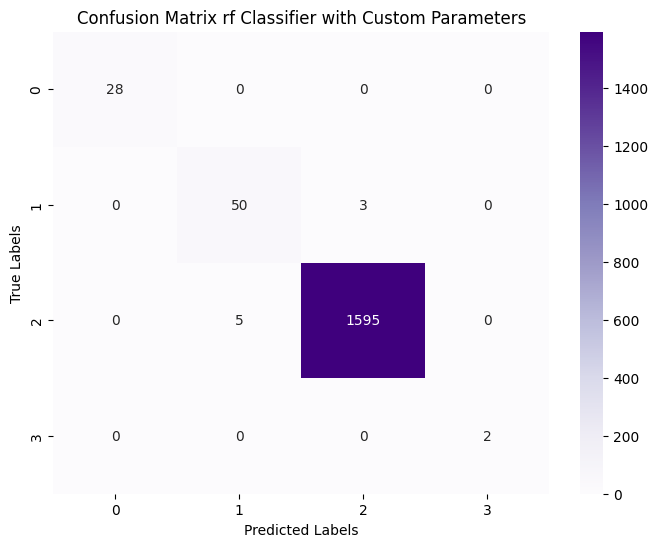

In [ ]:
y_pred_train_rf = rf_classifier.predict(x_train_valid_scaled)

# Evaluate the model
accuracy_rf = accuracy_score(y_train_valid, y_pred_train_rf)
precision_rf = precision_score(y_train_valid, y_pred_train_rf, average='weighted')  # Use 'weighted' for multi-class
recall_rf = recall_score(y_train_valid, y_pred_train_rf, average='weighted')
f1_rf = f1_score(y_train_valid, y_pred_train_rf, average='weighted')
conf_matrix_rf= confusion_matrix(y_train_valid, y_pred_train_rf)

# Print metrics
print(f"Accuracy (rf): {accuracy_rf}")
print(f"Precision (rf): {precision_rf}")
print(f"Recall (rf): {recall_rf}")
print(f"F1-score (rf): {f1_rf}")
print(f"Confusion Matrix (rf):\n{conf_matrix_rf}")

# Plot confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix_rf, annot=True, fmt="d", cmap="Purples",
            xticklabels=np.unique(y_train_valid), yticklabels=np.unique(y_train_valid))
plt.xlabel("Predicted Labels")
plt.ylabel("True Labels")
plt.title("Confusion Matrix rf Classifier with Custom Parameters")
plt.show()


/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


Accuracy (rf Test): 0.9100642398286938
Precision (rf Test): 0.8801570306923625
Recall (rf Test): 0.9100642398286938
F1-score (rf Test): 0.8834975453727498
Confusion Matrix (rf Test):
[[  1   0   1   0]
 [  0   6  31   0]
 [  0   4 418   0]
 [  0   0   6   0]]


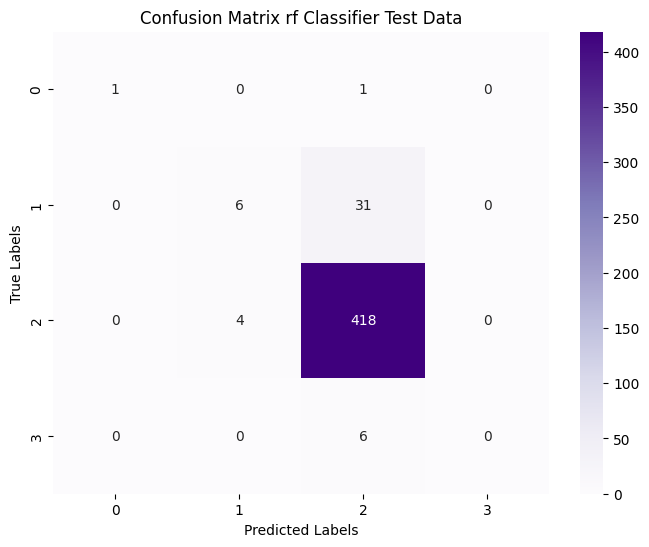

In [ ]:
# # Predict on test data
y_pred_test_rf = rf_classifier.predict(x_test_valid_scaled)

# Evaluate the model on test data
accuracy_rf_test = accuracy_score(y_test_valid, y_pred_test_rf)
precision_rf_test = precision_score(y_test_valid, y_pred_test_rf, average='weighted')  # Use 'weighted' for multi-class
recall_rf_test = recall_score(y_test_valid, y_pred_test_rf, average='weighted')
f1_rf_test = f1_score(y_test_valid, y_pred_test_rf, average='weighted')
conf_matrix_rf_test = confusion_matrix(y_test_valid, y_pred_test_rf)

# Print metrics
print(f"Accuracy (rf Test): {accuracy_rf_test}")
print(f"Precision (rf Test): {precision_rf_test}")
print(f"Recall (rf Test): {recall_rf_test}")
print(f"F1-score (rf Test): {f1_rf_test}")
print(f"Confusion Matrix (rf Test):\n{conf_matrix_rf_test}")

# Plot confusion matrix for test data
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix_rf_test, annot=True, fmt="d", cmap="Purples",
            xticklabels=np.unique(y_test_valid), yticklabels=np.unique(y_test_valid))
plt.xlabel("Predicted Labels")
plt.ylabel("True Labels")
plt.title("Confusion Matrix rf Classifier Test Data")
plt.show()


In [ ]:
y_pred_test_rf

array([2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,

In [ ]:
final_merged_RF_set1=final_merged_EXTRA_TREES_set1.copy()

In [ ]:
final_merged_RF_set1=final_merged_RF_set1.drop(columns=['predicted_labels_et'])

In [ ]:
final_merged_RF_set1

,Patient_ID,MYALGIAS/ MUSCLE ATROPHY,OSTEOARTHRITIS,OSTEOPOROSIS,"Muscular dystrophy, atrophy",new_labels
0,KHAIGHGPTTL318,5.401805e+08,6.080050e+08,9.792386e+08,Mild to Moderate,2
1,KHAIGHGPTTL319,4.279572e+08,9.211719e+04,1.154876e+09,-,2
2,KHAIGHGPTTL321,6.352002e+08,9.211719e+04,7.783474e+08,0,2
3,KHAIGHGPTTL348,5.776717e+08,2.428843e+08,1.076883e+09,Mild,1
4,KHAIGHGPTTL350,6.691975e+08,4.740202e+08,1.470514e+09,-,2
...,...,...,...,...,...,...
462,KHSSRIGPTTL8,2.146963e+08,0.000000e+00,6.266213e+08,Moderate,2
463,KHSSRIGPTTL9,2.429180e+08,2.303350e+05,3.512164e+08,-,2
464,KHTENTGPTTL15,6.044759e+07,2.429764e+08,1.628411e+09,Moderate,2
465,KHTRCLGPTTL52,1.984048e+09,2.430838e+08,1.429600e+09,Moderate,2


In [ ]:
import pandas as pd

# Convert y_pred_test_lgbm (array) into a DataFrame
# Assuming 'patient_id' exists in final_merged_LightGBM_set1 for proper alignment
y_pred_test_rf_df = pd.DataFrame({
    'y_pred_test_rf': y_pred_test_rf # Array of predictions
})

# Merge the predictions DataFrame with final_merged_LightGBM_set1
# If no specific key like 'patient_id' is required for the merge, use reset_index for alignment
final_merged_RF_set1 = final_merged_RF_set1.reset_index(drop=True)
y_pred_test_rf_df=y_pred_test_rf_df.reset_index(drop=True)

# Concatenate the predictions with the original DataFrame
final_merged_RF_set1 = pd.concat([final_merged_RF_set1, y_pred_test_rf_df], axis=1)

# Display the first few rows of the updated DataFrame
print(final_merged_RF_set1.head())


       Patient_ID  MYALGIAS/ MUSCLE ATROPHY  OSTEOARTHRITIS  OSTEOPOROSIS  \
0  KHAIGHGPTTL318               540180531.8    6.080050e+08  9.792386e+08   
1  KHAIGHGPTTL319               427957212.1    9.211719e+04  1.154876e+09   
2  KHAIGHGPTTL321               635200228.3    9.211719e+04  7.783474e+08   
3  KHAIGHGPTTL348               577671732.7    2.428843e+08  1.076883e+09   
4  KHAIGHGPTTL350               669197497.6    4.740202e+08  1.470514e+09   

  Muscular dystrophy, atrophy  new_labels  y_pred_test_rf  
0            Mild to Moderate           2               2  
1                           -           2               2  
2                           0           2               2  
3                        Mild           1               2  
4                           -           2               2  


In [ ]:
final_merged_RF_set1

,Patient_ID,MYALGIAS/ MUSCLE ATROPHY,OSTEOARTHRITIS,OSTEOPOROSIS,"Muscular dystrophy, atrophy",new_labels,y_pred_test_rf
0,KHAIGHGPTTL318,5.401805e+08,6.080050e+08,9.792386e+08,Mild to Moderate,2,2
1,KHAIGHGPTTL319,4.279572e+08,9.211719e+04,1.154876e+09,-,2,2
2,KHAIGHGPTTL321,6.352002e+08,9.211719e+04,7.783474e+08,0,2,2
3,KHAIGHGPTTL348,5.776717e+08,2.428843e+08,1.076883e+09,Mild,1,2
4,KHAIGHGPTTL350,6.691975e+08,4.740202e+08,1.470514e+09,-,2,2
...,...,...,...,...,...,...,...
462,KHSSRIGPTTL8,2.146963e+08,0.000000e+00,6.266213e+08,Moderate,2,2
463,KHSSRIGPTTL9,2.429180e+08,2.303350e+05,3.512164e+08,-,2,2
464,KHTENTGPTTL15,6.044759e+07,2.429764e+08,1.628411e+09,Moderate,2,2
465,KHTRCLGPTTL52,1.984048e+09,2.430838e+08,1.429600e+09,Moderate,2,2


In [ ]:
# final_merged_RF_set1.to_csv('/content/drive/MyDrive/MUSCULOSKELETAL HEALTH/final_merged_RF_musculoskeletal_set1.csv', index=False)

# XG BOOST

In [ ]:
df_test = df[df['Patient_ID'].isin(df2['Patient_ID'])].reset_index(drop=True)

In [ ]:
labels=pd.read_csv('/content/drive/MyDrive/MUSCULOSKELETAL HEALTH/new_labels_musculoskeletal_set1.csv')

In [ ]:
df_train = labels[~labels['Patient_ID'].isin(df2['Patient_ID'])].reset_index(drop=True)


In [ ]:
df_train

,Patient_ID,MYALGIAS/ MUSCLE ATROPHY,OSTEOARTHRITIS,OSTEOPOROSIS,"Muscular dystrophy, atrophy",new_labels
0,KHAIGHGPTTL155,5.712342e+08,3.739306e+07,1.152345e+09,0,2
1,KHAIGHGPTTL156,1.251631e+09,9.220119e+04,8.085465e+08,0,2
2,KHAIGHGPTTL157,6.028514e+08,2.764356e+05,9.785774e+08,0,2
3,KHAIGHGPTTL158,9.028730e+08,1.843184e+05,8.086463e+08,0,2
4,KHAIGHGPTTL159,6.047848e+08,2.763516e+05,1.175862e+09,0,2
...,...,...,...,...,...,...
1678,KHTENTGPTTL14,4.270590e+08,3.685527e+05,1.337207e+09,0,2
1679,KHTENTGPTTL16,2.422735e+08,1.885776e+07,8.768683e+08,0,2
1680,KHYUNQGPTTL10,1.851188e+08,0.000000e+00,3.647334e+08,0,2
1681,KHAIGPRX1340,1.504679e+06,0.000000e+00,2.499629e+08,0,2


In [ ]:
df_test

,Patient_ID,MYALGIAS/ MUSCLE ATROPHY,OSTEOARTHRITIS,OSTEOPOROSIS
0,KHAIGHGPTTL318,5.401805e+08,6.080050e+08,9.792386e+08
1,KHAIGHGPTTL319,4.279572e+08,9.211719e+04,1.154876e+09
2,KHAIGHGPTTL321,6.352002e+08,9.211719e+04,7.783474e+08
3,KHAIGHGPTTL348,5.776717e+08,2.428843e+08,1.076883e+09
4,KHAIGHGPTTL350,6.691975e+08,4.740202e+08,1.470514e+09
...,...,...,...,...
462,KHSSRIGPTTL8,2.146963e+08,0.000000e+00,6.266213e+08
463,KHSSRIGPTTL9,2.429180e+08,2.303350e+05,3.512164e+08
464,KHTENTGPTTL15,6.044759e+07,2.429764e+08,1.628411e+09
465,KHTRCLGPTTL52,1.984048e+09,2.430838e+08,1.429600e+09


In [ ]:
df_train_set2=df_train.copy()
df_train_set2=df_train_set2.drop(columns=['Patient_ID','Muscular dystrophy, atrophy'])

In [ ]:
scaler=MinMaxScaler()
smote=SMOTE()
test_split=0.2

In [ ]:
X = df_train_set1.drop(columns=['new_labels'])
y = df_train_set1['new_labels']
smote = SMOTE(k_neighbors=1) # Change k_neighbors to 1 or 2

X_balanced, y_balanced = smote.fit_resample(X, y)
X_train, X_test, y_train, y_test = train_test_split(
    X_balanced, y_balanced, test_size=test_split, random_state=42, stratify=y_balanced
)
X_train_scaled = scaler.fit_transform(X_train)
X_train_scaled = pd.DataFrame(X_train_scaled, columns=X_train.columns, index=X_train.index)
X_test_scaled = scaler.transform(X_test)
X_test_scaled = pd.DataFrame(X_test_scaled, columns=X_test.columns, index=X_test.index)

In [ ]:
x_train_valid=df_train_set2.drop(columns=['new_labels'])
y_train_valid=df_train_set2['new_labels']
x_train_valid_scaled=scaler.transform(x_train_valid)
x_train_valid_scaled=pd.DataFrame(x_train_valid_scaled,columns=x_train_valid.columns,index=x_train_valid.index)

In [ ]:
df_test=labels[labels['Patient_ID'].isin(df2['Patient_ID'])].reset_index(drop=True)

In [ ]:
df_test=df_test.drop(columns=['Patient_ID','Muscular dystrophy, atrophy'])

In [ ]:
x_test_valid=df_test.drop(columns=['new_labels'])
y_test_valid=df_test['new_labels']
x_test_valid_scaled=scaler.transform(x_test_valid)
x_test_valid_scaled=pd.DataFrame(x_test_valid_scaled,columns=x_test_valid.columns,index=x_test_valid.index)


/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [08:51:06] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


XGBoost Classifier Metrics:
Accuracy: 0.99765625
Precision: 0.9976635059093828
Recall: 0.99765625
F1-score: 0.997656238573706
Confusion Matrix:
[[320   0   0   0]
 [  0 319   1   0]
 [  2   0 318   0]
 [  0   0   0 320]]


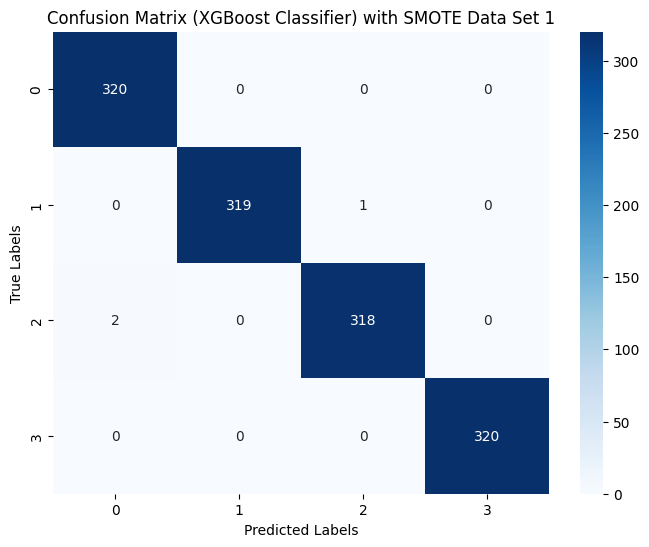

In [ ]:
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

# Initialize XGBoost Classifier with specified parameters
xgb_classifier = XGBClassifier(
    n_estimators=100,
    learning_rate=0.2,
    max_depth=5,
    random_state=42,
    use_label_encoder=False,  # Suppress label encoding warning (for newer versions of XGBoost)
    eval_metric='logloss'    # Specify the evaluation metric explicitly
)

# Train the classifier
xgb_classifier.fit(X_train_scaled, y_train)

# Predict
y_pred_xgb = xgb_classifier.predict(X_test_scaled)

# Evaluate the model
accuracy_xgb = accuracy_score(y_test, y_pred_xgb)
precision_xgb = precision_score(y_test, y_pred_xgb, average='weighted')
recall_xgb = recall_score(y_test, y_pred_xgb, average='weighted')
f1_xgb = f1_score(y_test, y_pred_xgb, average='weighted')
conf_matrix_xgb = confusion_matrix(y_test, y_pred_xgb)

# Print the evaluation metrics
print("XGBoost Classifier Metrics:")
print(f"Accuracy: {accuracy_xgb}")
print(f"Precision: {precision_xgb}")
print(f"Recall: {recall_xgb}")
print(f"F1-score: {f1_xgb}")
print(f"Confusion Matrix:\n{conf_matrix_xgb}")

# Plot the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix_xgb, annot=True, fmt="d", cmap="Blues",
            xticklabels=np.unique(y_test), yticklabels=np.unique(y_test))
plt.xlabel("Predicted Labels")
plt.ylabel("True Labels")
plt.title("Confusion Matrix (XGBoost Classifier) with SMOTE Data Set 1")
plt.show()


Accuracy (XGBoost): 0.9982174688057041
Precision (XGBoost): 0.9982963208214285
Recall (XGBoost): 0.9982174688057041
F1-score (XGBoost): 0.9982348496478483
Confusion Matrix (XGBoost):
[[  28    0    0    0]
 [   0   52    1    0]
 [   2    0 1598    0]
 [   0    0    0    2]]


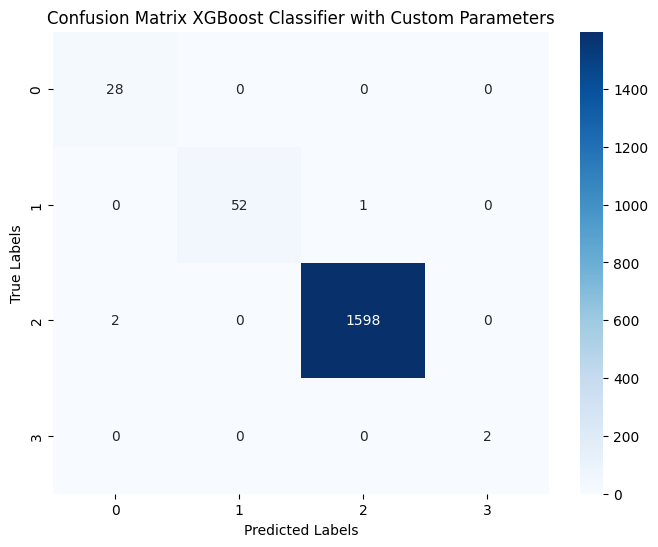

In [ ]:
# Predict on training data
y_pred_train_xgb = xgb_classifier.predict(x_train_valid_scaled)

# Evaluate the model
accuracy_xgb = accuracy_score(y_train_valid, y_pred_train_xgb)
precision_xgb = precision_score(y_train_valid, y_pred_train_xgb, average='weighted')  # Use 'weighted' for multi-class
recall_xgb = recall_score(y_train_valid, y_pred_train_xgb, average='weighted')
f1_xgb = f1_score(y_train_valid, y_pred_train_xgb, average='weighted')
conf_matrix_xgb = confusion_matrix(y_train_valid, y_pred_train_xgb)

# Print metrics
print(f"Accuracy (XGBoost): {accuracy_xgb}")
print(f"Precision (XGBoost): {precision_xgb}")
print(f"Recall (XGBoost): {recall_xgb}")
print(f"F1-score (XGBoost): {f1_xgb}")
print(f"Confusion Matrix (XGBoost):\n{conf_matrix_xgb}")

# Plot confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix_xgb, annot=True, fmt="d", cmap="Blues",
            xticklabels=np.unique(y_train_valid), yticklabels=np.unique(y_train_valid))
plt.xlabel("Predicted Labels")
plt.ylabel("True Labels")
plt.title("Confusion Matrix XGBoost Classifier with Custom Parameters")
plt.show()


/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


Accuracy (XGBoost Test): 0.9100642398286938
Precision (XGBoost Test): 0.8857176846470209
Recall (XGBoost Test): 0.9100642398286938
F1-score (XGBoost Test): 0.8897925812762684
Confusion Matrix (XGBoost Test):
[[  1   0   1   0]
 [  0   9  28   0]
 [  2   5 415   0]
 [  0   0   6   0]]


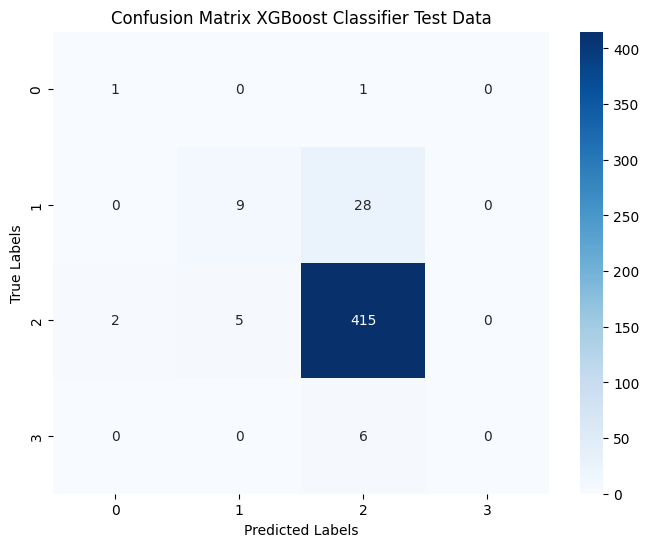

In [ ]:
# Predict on test data
y_pred_test_xgb = xgb_classifier.predict(x_test_valid_scaled)

# Evaluate the model on test data
accuracy_xgb_test = accuracy_score(y_test_valid, y_pred_test_xgb)
precision_xgb_test = precision_score(y_test_valid, y_pred_test_xgb, average='weighted')  # Use 'weighted' for multi-class
recall_xgb_test = recall_score(y_test_valid, y_pred_test_xgb, average='weighted')
f1_xgb_test = f1_score(y_test_valid, y_pred_test_xgb, average='weighted')
conf_matrix_xgb_test = confusion_matrix(y_test_valid, y_pred_test_xgb)

# Print metrics
print(f"Accuracy (XGBoost Test): {accuracy_xgb_test}")
print(f"Precision (XGBoost Test): {precision_xgb_test}")
print(f"Recall (XGBoost Test): {recall_xgb_test}")
print(f"F1-score (XGBoost Test): {f1_xgb_test}")
print(f"Confusion Matrix (XGBoost Test):\n{conf_matrix_xgb_test}")

# Plot confusion matrix for test data
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix_xgb_test, annot=True, fmt="d", cmap="Blues",
            xticklabels=np.unique(y_test_valid), yticklabels=np.unique(y_test_valid))
plt.xlabel("Predicted Labels")
plt.ylabel("True Labels")
plt.title("Confusion Matrix XGBoost Classifier Test Data")
plt.show()


In [ ]:
 y_pred_test_xgb

array([2, 2, 2, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 0, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 1, 2, 2, 2, 2, 2, 2, 2, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 1, 2, 2, 2, 1, 2, 2, 2, 2, 2, 2, 1,

In [ ]:
final_merged_XGB_set1=final_merged_EXTRA_TREES_set1.copy()

In [ ]:
final_merged_XGB_set1=final_merged_XGB_set1.drop(columns=['predicted_labels_et'])

In [ ]:
final_merged_XGB_set1

,Patient_ID,MYALGIAS/ MUSCLE ATROPHY,OSTEOARTHRITIS,OSTEOPOROSIS,"Muscular dystrophy, atrophy",new_labels
0,KHAIGHGPTTL318,5.401805e+08,6.080050e+08,9.792386e+08,Mild to Moderate,2
1,KHAIGHGPTTL319,4.279572e+08,9.211719e+04,1.154876e+09,-,2
2,KHAIGHGPTTL321,6.352002e+08,9.211719e+04,7.783474e+08,0,2
3,KHAIGHGPTTL348,5.776717e+08,2.428843e+08,1.076883e+09,Mild,1
4,KHAIGHGPTTL350,6.691975e+08,4.740202e+08,1.470514e+09,-,2
...,...,...,...,...,...,...
462,KHSSRIGPTTL8,2.146963e+08,0.000000e+00,6.266213e+08,Moderate,2
463,KHSSRIGPTTL9,2.429180e+08,2.303350e+05,3.512164e+08,-,2
464,KHTENTGPTTL15,6.044759e+07,2.429764e+08,1.628411e+09,Moderate,2
465,KHTRCLGPTTL52,1.984048e+09,2.430838e+08,1.429600e+09,Moderate,2


In [ ]:
import pandas as pd

# Convert y_pred_test_lgbm (array) into a DataFrame
# Assuming 'patient_id' exists in final_merged_LightGBM_set1 for proper alignment
y_pred_test_xgb_df = pd.DataFrame({
    'y_pred_test_xgb': y_pred_test_xgb # Array of predictions
})

# Merge the predictions DataFrame with final_merged_LightGBM_set1
# If no specific key like 'patient_id' is required for the merge, use reset_index for alignment
final_merged_XGB_set1 = final_merged_XGB_set1.reset_index(drop=True)
y_pred_test_xgb_df=y_pred_test_xgb_df.reset_index(drop=True)

# Concatenate the predictions with the original DataFrame
final_merged_XGB_set1 = pd.concat([final_merged_XGB_set1, y_pred_test_xgb_df], axis=1)

# Display the first few rows of the updated DataFrame
print(final_merged_XGB_set1.head())


       Patient_ID  MYALGIAS/ MUSCLE ATROPHY  OSTEOARTHRITIS  OSTEOPOROSIS  \
0  KHAIGHGPTTL318               540180531.8    6.080050e+08  9.792386e+08   
1  KHAIGHGPTTL319               427957212.1    9.211719e+04  1.154876e+09   
2  KHAIGHGPTTL321               635200228.3    9.211719e+04  7.783474e+08   
3  KHAIGHGPTTL348               577671732.7    2.428843e+08  1.076883e+09   
4  KHAIGHGPTTL350               669197497.6    4.740202e+08  1.470514e+09   

  Muscular dystrophy, atrophy  new_labels  y_pred_test_xgb  
0            Mild to Moderate           2                2  
1                           -           2                2  
2                           0           2                2  
3                        Mild           1                1  
4                           -           2                2  


In [ ]:
final_merged_XGB_set1

,Patient_ID,MYALGIAS/ MUSCLE ATROPHY,OSTEOARTHRITIS,OSTEOPOROSIS,"Muscular dystrophy, atrophy",new_labels,y_pred_test_xgb
0,KHAIGHGPTTL318,5.401805e+08,6.080050e+08,9.792386e+08,Mild to Moderate,2,2
1,KHAIGHGPTTL319,4.279572e+08,9.211719e+04,1.154876e+09,-,2,2
2,KHAIGHGPTTL321,6.352002e+08,9.211719e+04,7.783474e+08,0,2,2
3,KHAIGHGPTTL348,5.776717e+08,2.428843e+08,1.076883e+09,Mild,1,1
4,KHAIGHGPTTL350,6.691975e+08,4.740202e+08,1.470514e+09,-,2,2
...,...,...,...,...,...,...,...
462,KHSSRIGPTTL8,2.146963e+08,0.000000e+00,6.266213e+08,Moderate,2,2
463,KHSSRIGPTTL9,2.429180e+08,2.303350e+05,3.512164e+08,-,2,2
464,KHTENTGPTTL15,6.044759e+07,2.429764e+08,1.628411e+09,Moderate,2,2
465,KHTRCLGPTTL52,1.984048e+09,2.430838e+08,1.429600e+09,Moderate,2,2


In [ ]:
# final_merged_XGB_set1.to_csv('/content/drive/MyDrive/MUSCULOSKELETAL HEALTH/final_merged_XGB_musculoskeletal_set1.csv', index=False)

# satcked model

In [ ]:
# prompt: create a pickle file by integrating the above two models stacked with scaler_stacked , on giving input to the pickle file it should transofmr data itself and giv eoutput
from sklearn.pipeline import Pipeline
from sklearn.ensemble import StackingClassifier
import pickle
from sklearn.linear_model import LogisticRegression
meta_model = LogisticRegression()

# Create the stacking classifier
stacked_model = StackingClassifier(
    estimators=[("lgbm_classifier",lgbm_classifier), (" et_classifier",  et_classifier), ("rf_classifier",rf_classifier), ('gb_classifier',gb_classifier)],
    final_estimator=meta_model
)

# Create a pipeline that integrates scaling and stacking
pipeline = Pipeline([
    ("scaler", scaler),  # First step: Scaling
    ("stacked_model", stacked_model)  # Second step: Stacked Model
])

# Train the pipeline
pipeline.fit(X_train, y_train)
filename = '/content/drive/MyDrive/MUSCULOSKELETAL HEALTH/stacked_model_MusculoSkeletal.pkl'

# Save the pipeline to a pickle file
with open(filename, "wb") as f:
    pickle.dump(pipeline, f)

print(f"Model saved successfully as {filename}")


[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000292 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 765
[LightGBM] [Info] Number of data points in the train set: 5120, number of used features: 3
[LightGBM] [Info] Start training from score -1.386294
[LightGBM] [Info] Start training from score -1.386294
[LightGBM] [Info] Start training from score -1.386294
[LightGBM] [Info] Start training from score -1.386294
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with posi

/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No f

/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000160 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 765
[LightGBM] [Info] Number of data points in the train set: 4096, number of used features: 3
[LightGBM] [Info] Start training from score -1.386294
[LightGBM] [Info] Start training from score -1.386294
[LightGBM] [Info] Start training from score -1.386294
[LightGBM] [Info] Start training from score -1.386294
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with posi

/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000214 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 765
[LightGBM] [Info] Number of data points in the train set: 4096, number of used features: 3
[LightGBM] [Info] Start training from score -1.386294
[LightGBM] [Info] Start training from score -1.386294
[LightGBM] [Info] Start training from score -1.386294
[LightGBM] [Info] Start training from score -1.386294
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with posi

/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000269 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 765
[LightGBM] [Info] Number of data points in the train set: 4096, number of used features: 3
[LightGBM] [Info] Start training from score -1.386294
[LightGBM] [Info] Start training from score -1.386294
[LightGBM] [Info] Start training from score -1.386294
[LightGBM] [Info] Start training from score -1.386294
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with posi

/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000280 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 765
[LightGBM] [Info] Number of data points in the train set: 4096, number of used features: 3
[LightGBM] [Info] Start training from score -1.386294
[LightGBM] [Info] Start training from score -1.386294
[LightGBM] [Info] Start training from score -1.386294
[LightGBM] [Info] Start training from score -1.386294
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with posi

/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


Model saved successfully as /content/drive/MyDrive/MUSCULOSKELETAL HEALTH/stacked_model_MusculoSkeletal.pkl


In [ ]:
x_train_valid

,MYALGIAS/ MUSCLE ATROPHY,OSTEOARTHRITIS,OSTEOPOROSIS
0,5.712342e+08,3.739306e+07,1.152345e+09
1,1.251631e+09,9.220119e+04,8.085465e+08
2,6.028514e+08,2.764356e+05,9.785774e+08
3,9.028730e+08,1.843184e+05,8.086463e+08
4,6.047848e+08,2.763516e+05,1.175862e+09
...,...,...,...
1678,4.270590e+08,3.685527e+05,1.337207e+09
1679,2.422735e+08,1.885776e+07,8.768683e+08
1680,1.851188e+08,0.000000e+00,3.647334e+08
1681,1.504679e+06,0.000000e+00,2.499629e+08


In [ ]:
with open(filename, "rb") as f:
    loaded_pipeline = pickle.load(f)


predictions = loaded_pipeline.predict(x_train_valid)
accuracy=accuracy_score(y_train_valid, predictions)
from sklearn.metrics import classification_report
report=classification_report(y_train_valid,predictions)
print(classification_report)
print(f"Accuracy: {accuracy}")
print("Predictions:", predictions)

<function classification_report at 0x7ba814ee14e0>
Accuracy: 0.9994058229352347
Predictions: [2 2 2 ... 2 2 2]


/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


In [ ]:
report

'              precision    recall  f1-score   support\n\n           0       1.00      1.00      1.00        28\n           1       1.00      0.98      0.99        53\n           2       1.00      1.00      1.00      1600\n           3       1.00      1.00      1.00         2\n\n    accuracy                           1.00      1683\n   macro avg       1.00      1.00      1.00      1683\nweighted avg       1.00      1.00      1.00      1683\n'

In [ ]:
# Example usage after saving the model:
with open(filename, 'rb') as file:
    loaded_model = pickle.load(file)

# Example data (replace with your actual data)
# Assuming 'x_test_valid' is the same as the original one
new_data = x_test_valid.iloc[:5] # sample input

predictions = loaded_model.predict(new_data)
predictions

/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


array([2, 2, 2, 1, 2])

In [ ]:
y_test_valid

,new_labels
0,2
1,2
2,2
3,1
4,2
...,...
462,2
463,2
464,2
465,2


# CLASSIFICATION GRAPHS

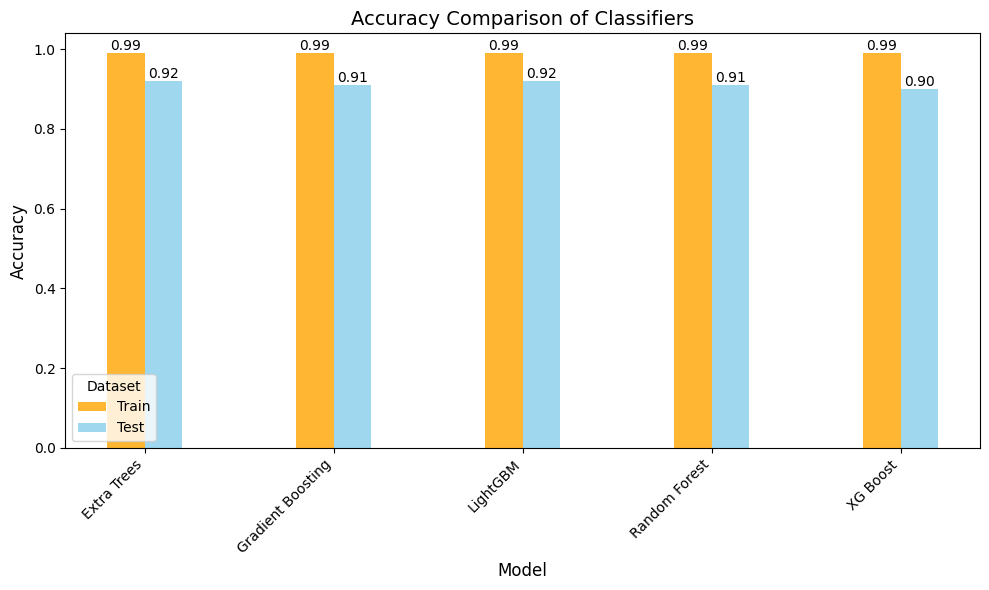

In [ ]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

# Recall values for different classifiers (Train and Test)
recall_values = {
    "Model": ["Extra Trees","Gradient Boosting","LightGBM", "Random Forest","XG Boost"],
    "Train Recall": [0.99,0.99,0.99,0.99,0.99],  # Replace with your actual train recall values
    "Test Recall": [0.92,0.91,0.92,0.91,0.90]    # Replace with your actual test recall values
}

# Create a DataFrame
df = pd.DataFrame(recall_values)

# Plot the grouped bar chart
x = np.arange(len(df["Model"]))  # X positions for groups
width = 0.2  # Reduced width of the bars

fig, ax = plt.subplots(figsize=(10, 6))
bar1 = ax.bar(x - width/2, df["Train Recall"], width, label='Train', color='orange', alpha=0.8)
bar2 = ax.bar(x + width/2, df["Test Recall"], width, label='Test', color='skyblue', alpha=0.8)

# Add text labels above the bars
for bar in bar1:
    ax.text(bar.get_x() + bar.get_width()/2, bar.get_height(), f'{bar.get_height():.2f}', ha='center', va='bottom')
for bar in bar2:
    ax.text(bar.get_x() + bar.get_width()/2, bar.get_height(), f'{bar.get_height():.2f}', ha='center', va='bottom')

# Add labels, title, and legend
ax.set_xlabel("Model", fontsize=12)
ax.set_ylabel("Accuracy", fontsize=12)
ax.set_title("Accuracy Comparison of Classifiers", fontsize=14)
ax.set_xticks(x)
ax.set_xticklabels(df["Model"], rotation=45, ha='right', fontsize=10)
ax.legend(title="Dataset", fontsize=10)

# Display the plot
plt.tight_layout()
plt.show()


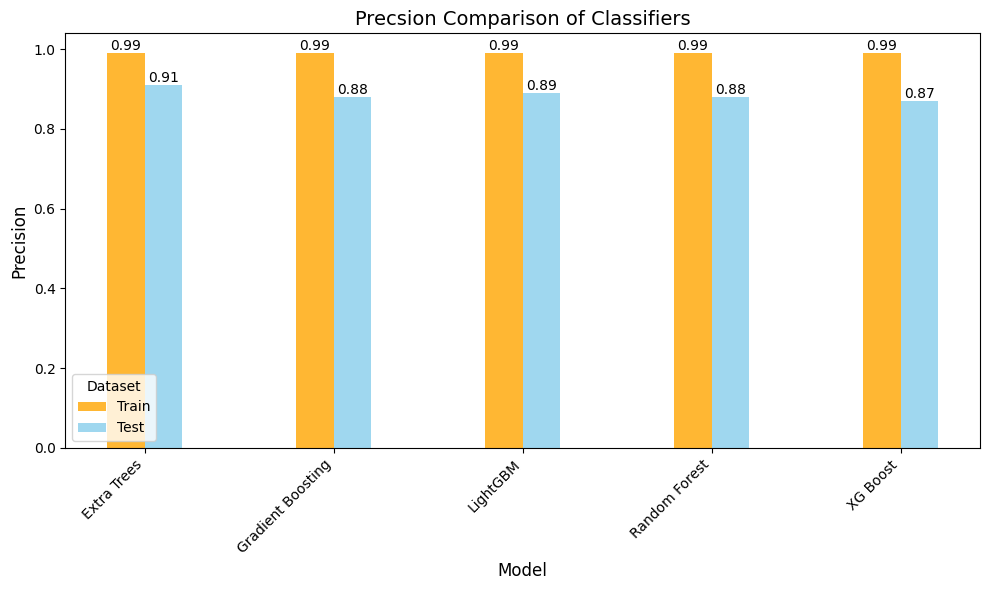

In [ ]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

# Recall values for different classifiers (Train and Test)
recall_values = {
    "Model": ["Extra Trees","Gradient Boosting","LightGBM", "Random Forest","XG Boost"],
    "Train Recall": [0.99,0.99,0.99,0.99,0.99],  # Replace with your actual train recall values
    "Test Recall": [0.91,0.88,0.89,0.88,0.87]    # Replace with your actual test recall values
}

# Create a DataFrame
df = pd.DataFrame(recall_values)

# Plot the grouped bar chart
x = np.arange(len(df["Model"]))  # X positions for groups
width = 0.2  # Reduced width of the bars

fig, ax = plt.subplots(figsize=(10, 6))
bar1 = ax.bar(x - width/2, df["Train Recall"], width, label='Train', color='orange', alpha=0.8)
bar2 = ax.bar(x + width/2, df["Test Recall"], width, label='Test', color='skyblue', alpha=0.8)

# Add text labels above the bars
for bar in bar1:
    ax.text(bar.get_x() + bar.get_width()/2, bar.get_height(), f'{bar.get_height():.2f}', ha='center', va='bottom')
for bar in bar2:
    ax.text(bar.get_x() + bar.get_width()/2, bar.get_height(), f'{bar.get_height():.2f}', ha='center', va='bottom')

# Add labels, title, and legend
ax.set_xlabel("Model", fontsize=12)
ax.set_ylabel("Precision", fontsize=12)
ax.set_title("Precsion Comparison of Classifiers", fontsize=14)
ax.set_xticks(x)
ax.set_xticklabels(df["Model"], rotation=45, ha='right', fontsize=10)
ax.legend(title="Dataset", fontsize=10)

# Display the plot
plt.tight_layout()
plt.show()


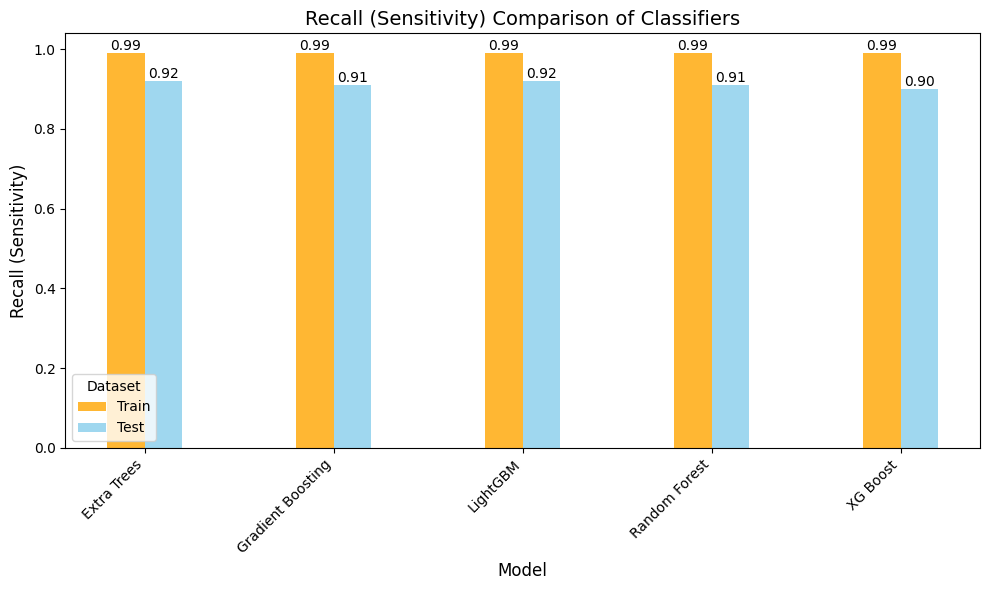

In [ ]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

# Recall values for different classifiers (Train and Test)
recall_values = {
    "Model": ["Extra Trees","Gradient Boosting","LightGBM", "Random Forest","XG Boost"],
    "Train Recall": [0.99,0.99,0.99,0.99,0.99],  # Replace with your actual train recall values
    "Test Recall": [0.92,0.91,0.92,0.91,0.90]    # Replace with your actual test recall values
}

# Create a DataFrame
df = pd.DataFrame(recall_values)

# Plot the grouped bar chart
x = np.arange(len(df["Model"]))  # X positions for groups
width = 0.2  # Reduced width of the bars

fig, ax = plt.subplots(figsize=(10, 6))
bar1 = ax.bar(x - width/2, df["Train Recall"], width, label='Train', color='orange', alpha=0.8)
bar2 = ax.bar(x + width/2, df["Test Recall"], width, label='Test', color='skyblue', alpha=0.8)

# Add text labels above the bars
for bar in bar1:
    ax.text(bar.get_x() + bar.get_width()/2, bar.get_height(), f'{bar.get_height():.2f}', ha='center', va='bottom')
for bar in bar2:
    ax.text(bar.get_x() + bar.get_width()/2, bar.get_height(), f'{bar.get_height():.2f}', ha='center', va='bottom')

# Add labels, title, and legend
ax.set_xlabel("Model", fontsize=12)
ax.set_ylabel("Recall (Sensitivity)", fontsize=12)
ax.set_title("Recall (Sensitivity) Comparison of Classifiers", fontsize=14)
ax.set_xticks(x)
ax.set_xticklabels(df["Model"], rotation=45, ha='right', fontsize=10)
ax.legend(title="Dataset", fontsize=10)

# Display the plot
plt.tight_layout()
plt.show()


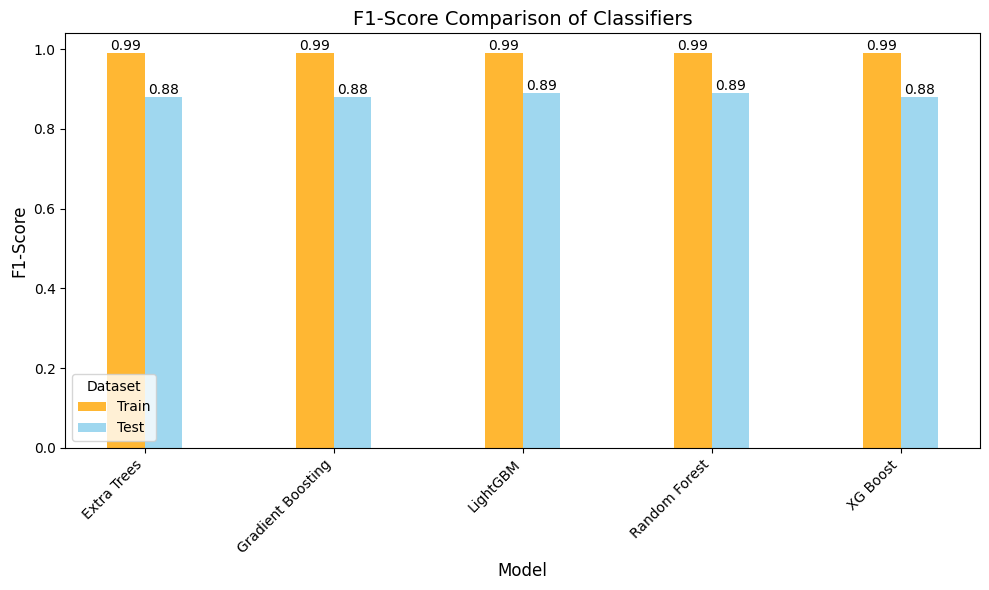

In [ ]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

# Recall values for different classifiers (Train and Test)
recall_values = {
    "Model": ["Extra Trees","Gradient Boosting","LightGBM", "Random Forest","XG Boost"],
    "Train Recall": [0.99,0.99,0.99,0.99,0.99],  # Replace with your actual train recall values
    "Test Recall": [0.88,0.88,0.89,0.89,0.88]    # Replace with your actual test recall values
}

# Create a DataFrame
df = pd.DataFrame(recall_values)

# Plot the grouped bar chart
x = np.arange(len(df["Model"]))  # X positions for groups
width = 0.2  # Reduced width of the bars

fig, ax = plt.subplots(figsize=(10, 6))
bar1 = ax.bar(x - width/2, df["Train Recall"], width, label='Train', color='orange', alpha=0.8)
bar2 = ax.bar(x + width/2, df["Test Recall"], width, label='Test', color='skyblue', alpha=0.8)

# Add text labels above the bars
for bar in bar1:
    ax.text(bar.get_x() + bar.get_width()/2, bar.get_height(), f'{bar.get_height():.2f}', ha='center', va='bottom')
for bar in bar2:
    ax.text(bar.get_x() + bar.get_width()/2, bar.get_height(), f'{bar.get_height():.2f}', ha='center', va='bottom')

# Add labels, title, and legend
ax.set_xlabel("Model", fontsize=12)
ax.set_ylabel("F1-Score", fontsize=12)
ax.set_title("F1-Score Comparison of Classifiers", fontsize=14)
ax.set_xticks(x)
ax.set_xticklabels(df["Model"], rotation=45, ha='right', fontsize=10)
ax.legend(title="Dataset", fontsize=10)

# Display the plot
plt.tight_layout()
plt.show()


In [ ]:
import seaborn as sns
import pandas as pd

In [ ]:
labels=pd.read_csv('/content/drive/MyDrive/MUSCULOSKELETAL HEALTH/new_labels_musculoskeletal_set1.csv')

In [ ]:
labels

,Patient_ID,MYALGIAS/ MUSCLE ATROPHY,OSTEOARTHRITIS,OSTEOPOROSIS,"Muscular dystrophy, atrophy",new_labels
0,KHAIGHGPTTL155,5.712342e+08,3.739306e+07,1.152345e+09,0,2
1,KHAIGHGPTTL156,1.251631e+09,9.220119e+04,8.085465e+08,0,2
2,KHAIGHGPTTL157,6.028514e+08,2.764356e+05,9.785774e+08,0,2
3,KHAIGHGPTTL158,9.028730e+08,1.843184e+05,8.086463e+08,0,2
4,KHAIGHGPTTL159,6.047848e+08,2.763516e+05,1.175862e+09,0,2
...,...,...,...,...,...,...
2145,KHTRCLGPTTL52,1.984048e+09,2.430838e+08,1.429600e+09,Moderate,2
2146,KHYUNQGPTTL10,1.851188e+08,0.000000e+00,3.647334e+08,0,2
2147,KHYUNQGPTTL11,1.831921e+08,4.610059e+04,6.262528e+08,Moderate,2
2148,KHAIGPRX1340,1.504679e+06,0.000000e+00,2.499629e+08,0,2


In [ ]:
# new_df=labels.drop(columns=['Patient_ID','Muscular dystrophy, atrophy'],inplace=True)

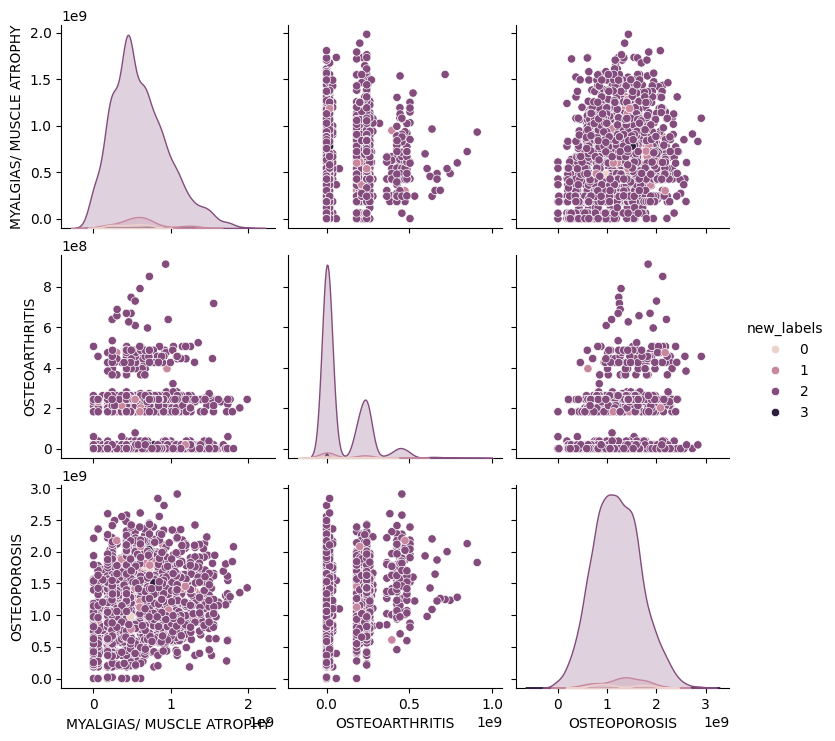

In [ ]:
# Instead of using inplace=True, reassign the modified DataFrame to new_df
new_df = labels.drop(columns=['Patient_ID','Muscular dystrophy, atrophy'])

# Now you can use new_df in sns.pairplot
sns.pairplot(new_df, hue='new_labels')

# past codes

In [ ]:
# df_test=labels[labels['Patient_ID'].isin(df2['Patient_ID'])].reset_index(drop=True)

In [ ]:
# df_test=df_test.drop(columns=['Patient_ID','Muscular dystrophy, atrophy'])

In [ ]:
# scaler=MinMaxScaler()
# smote=SMOTE()
# test_split=0.3

In [ ]:
# x_test_valid=df_test.drop(columns=['new_labels'])
# y_test_valid=df_test['new_labels']
# x_test_valid_scaled=scaler.transform(x_test_valid)
# x_test_valid_scaled=pd.DataFrame(x_test_valid_scaled,columns=x_test_valid.columns,index=x_test_valid.index)


In [ ]:
# x_test_valid=df_test.drop(columns=['new_labels'])
# y_test_valid=df_test['new_labels']

In [ ]:
/

()

In [ ]:
# df_train = labels[~labels['Patient_ID'].isin(df2['Patient_ID'])].reset_index(drop=True)


In [ ]:
# import numpy as np
# import pandas as pd
# import seaborn as sns
# import matplotlib.pyplot as plt
# from imblearn.over_sampling import SMOTE
# from sklearn.preprocessing import StandardScaler
# from sklearn.model_selection import train_test_split
# from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier, ExtraTreesClassifier
# from xgboost import XGBClassifier
# from lightgbm import LGBMClassifier
# from sklearn.linear_model import LogisticRegression
# from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix

# # -----------------------------------
# # Step 1: Data Preprocessing
# # -----------------------------------

# # Prepare training data (following your structure)
# df_train_set1 = df_train.copy()
# df_train_set1 = df_train_set1.drop(columns=['Patient_ID', 'Muscular dystrophy, atrophy'])

# # Extract features and target variable
# X = df_train_set1.drop(columns=['new_labels'])
# y = df_train_set1['new_labels']

# # Apply SMOTE for class balancing
# smote = SMOTE(sampling_strategy={0: 100, 1: 200, 2: 2022, 3: 400}, k_neighbors=1)
# X_balanced, y_balanced = smote.fit_resample(X, y)

# # Split into train and test sets
# test_split = 0.3
# X_train, X_test, y_train, y_test = train_test_split(
#     X_balanced, y_balanced, test_size=test_split, random_state=42, stratify=y_balanced
# )

# # Feature scaling (StandardScaler)
# scaler = StandardScaler()
# X_train_scaled = pd.DataFrame(scaler.fit_transform(X_train), columns=X_train.columns, index=X_train.index)
# X_test_scaled = pd.DataFrame(scaler.transform(X_test), columns=X_test.columns, index=X_test.index)

# # Prepare validation datasets
# x_train_valid = df_train_set1.drop(columns=['new_labels'])
# y_train_valid = df_train_set1['new_labels']
# x_train_valid_scaled = pd.DataFrame(scaler.transform(x_train_valid), columns=x_train_valid.columns, index=x_train_valid.index)

# df_test = labels[labels['Patient_ID'].isin(df2['Patient_ID'])].reset_index(drop=True)
# df_test = df_test.drop(columns=['Patient_ID', 'Muscular dystrophy, atrophy'])
# x_test_valid = df_test.drop(columns=['new_labels'])
# y_test_valid = df_test['new_labels']
# x_test_valid_scaled = pd.DataFrame(scaler.transform(x_test_valid), columns=x_test_valid.columns, index=x_test_valid.index)

# # -----------------------------------
# # Step 2: Train Base Models
# # -----------------------------------

# # Define base models
# model1 = ExtraTreesClassifier(n_estimators=200, max_depth=None, min_samples_split=5, random_state=42)
# model2 = RandomForestClassifier(n_estimators=200, random_state=42)
# model3 = GradientBoostingClassifier(n_estimators=200, random_state=42)
# model4 = XGBClassifier(n_estimators=200, random_state=42)
# model5 = LGBMClassifier(n_estimators=200, random_state=42)

# models = [model1, model2, model3, model4, model5]

# # Train base models
# for model in models:
#     model.fit(X_train_scaled, y_train)

# # -----------------------------------
# # Step 3: Generate Meta-Features
# # -----------------------------------

# # Generate predictions from base models to use as input for the meta-model
# meta_train = np.column_stack([model.predict_proba(X_train_scaled)[:, 1] for model in models])
# meta_test = np.column_stack([model.predict_proba(X_test_scaled)[:, 1] for model in models])

# # -----------------------------------
# # Step 4: Train Meta-Model
# # -----------------------------------

# meta_model = LogisticRegression()
# meta_model.fit(meta_train, y_train)

# # Final predictions using stacked model
# final_preds = meta_model.predict(meta_test)

# # -----------------------------------
# # Step 5: Evaluate Stacked Model on X_test_scaled
# # -----------------------------------

# accuracy = accuracy_score(y_test, final_preds)
# precision = precision_score(y_test, final_preds, average='weighted')
# recall = recall_score(y_test, final_preds, average='weighted')
# f1 = f1_score(y_test, final_preds, average='weighted')
# conf_matrix = confusion_matrix(y_test, final_preds)

# # Print evaluation metrics
# print("Stacked Model Metrics on X_test_scaled:")
# print(f"Accuracy: {accuracy}")
# print(f"Precision: {precision}")
# print(f"Recall: {recall}")
# print(f"F1-score: {f1}")
# print(f"Confusion Matrix:\n{conf_matrix}")

# # Plot confusion matrix
# plt.figure(figsize=(8, 6))
# sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues",
#             xticklabels=np.unique(y_test), yticklabels=np.unique(y_test))
# plt.xlabel("Predicted Labels")
# plt.ylabel("True Labels")
# plt.title("Confusion Matrix (Stacked Model - X_test_scaled)")
# plt.show()

# # -----------------------------------
# # Step 6: Evaluate Stacked Model on x_train_valid_scaled
# # -----------------------------------

# meta_train_valid = np.column_stack([model.predict_proba(x_train_valid_scaled)[:, 1] for model in models])
# final_preds_train = meta_model.predict(meta_train_valid)

# accuracy_train = accuracy_score(y_train_valid, final_preds_train)
# precision_train = precision_score(y_train_valid, final_preds_train, average='weighted')
# recall_train = recall_score(y_train_valid, final_preds_train, average='weighted')
# f1_train = f1_score(y_train_valid, final_preds_train, average='weighted')
# conf_matrix_train = confusion_matrix(y_train_valid, final_preds_train)

# print("\nStacked Model Metrics on x_train_valid_scaled:")
# print(f"Accuracy: {accuracy_train}")
# print(f"Precision: {precision_train}")
# print(f"Recall: {recall_train}")
# print(f"F1-score: {f1_train}")
# print(f"Confusion Matrix:\n{conf_matrix_train}")

# plt.figure(figsize=(8, 6))
# sns.heatmap(conf_matrix_train, annot=True, fmt="d", cmap="Blues",
#             xticklabels=np.unique(y_train_valid), yticklabels=np.unique(y_train_valid))
# plt.xlabel("Predicted Labels")
# plt.ylabel("True Labels")
# plt.title("Confusion Matrix (Stacked Model - x_train_valid_scaled)")
# plt.show()

# # -----------------------------------
# # Step 7: Evaluate Stacked Model on x_test_valid_scaled (Final Test Set)
# # -----------------------------------

# meta_test_final = np.column_stack([model.predict_proba(x_test_valid_scaled)[:, 1] for model in models])
# final_preds_test = meta_model.predict(meta_test_final)

# accuracy_final = accuracy_score(y_test_valid, final_preds_test)
# precision_final = precision_score(y_test_valid, final_preds_test, average='weighted')
# recall_final = recall_score(y_test_valid, final_preds_test, average='weighted')
# f1_final = f1_score(y_test_valid, final_preds_test, average='weighted')
# conf_matrix_final = confusion_matrix(y_test_valid, final_preds_test)

# print("\nStacked Model Metrics on x_test_valid_scaled:")
# print(f"Accuracy: {accuracy_final}")
# print(f"Precision: {precision_final}")
# print(f"Recall: {recall_final}")
# print(f"F1-score: {f1_final}")
# print(f"Confusion Matrix:\n{conf_matrix_final}")

# plt.figure(figsize=(8, 6))
# sns.heatmap(conf_matrix_final, annot=True, fmt="d", cmap="Blues",
#             xticklabels=np.unique(y_test_valid), yticklabels=np.unique(y_test_valid))
# plt.xlabel("Predicted Labels")
# plt.ylabel("True Labels")
# plt.title("Confusion Matrix (Stacked Model - x_test_valid_scaled)")
# plt.show()


In [ ]:
# !pip install scikit-learn==1.3.0

In [ ]:
# import numpy as np
# import pandas as pd
# import seaborn as sns
# import matplotlib.pyplot as plt
# from imblearn.over_sampling import SMOTE
# from sklearn.preprocessing import StandardScaler
# from sklearn.model_selection import train_test_split
# from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier, ExtraTreesClassifier, VotingClassifier
# from xgboost import XGBClassifier
# from lightgbm import LGBMClassifier
# from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix

# # -----------------------------------
# # Step 1: Data Preprocessing
# # -----------------------------------

# # Prepare training data
# df_train_set1 = df_train.copy()
# df_train_set1 = df_train_set1.drop(columns=['Patient_ID', 'Muscular dystrophy, atrophy'])

# # Extract features and target variable
# X = df_train_set1.drop(columns=['new_labels'])
# y = df_train_set1['new_labels']

# # Apply SMOTE for class balancing
# smote = SMOTE(sampling_strategy={0: 100, 1: 200, 2: 2022, 3: 400}, k_neighbors=1)
# X_balanced, y_balanced = smote.fit_resample(X, y)

# # Split into train and test sets
# test_split = 0.3
# X_train, X_test, y_train, y_test = train_test_split(
#     X_balanced, y_balanced, test_size=test_split, random_state=42, stratify=y_balanced
# )

# # Feature scaling (StandardScaler)
# scaler = StandardScaler()
# X_train_scaled = pd.DataFrame(scaler.fit_transform(X_train), columns=X_train.columns, index=X_train.index)
# X_test_scaled = pd.DataFrame(scaler.transform(X_test), columns=X_test.columns, index=X_test.index)

# # Prepare validation dataset
# x_train_valid = df_train_set1.drop(columns=['new_labels'])
# y_train_valid = df_train_set1['new_labels']
# x_train_valid_scaled = pd.DataFrame(scaler.transform(x_train_valid), columns=x_train_valid.columns, index=x_train_valid.index)

# df_test = labels[labels['Patient_ID'].isin(df2['Patient_ID'])].reset_index(drop=True)
# df_test = df_test.drop(columns=['Patient_ID', 'Muscular dystrophy, atrophy'])
# x_test_valid = df_test.drop(columns=['new_labels'])
# y_test_valid = df_test['new_labels']
# x_test_valid_scaled = pd.DataFrame(scaler.transform(x_test_valid), columns=x_test_valid.columns, index=x_test_valid.index)

# # -----------------------------------
# # Step 2: Define and Train Voting Classifier
# # -----------------------------------

# # Define base classifiers
# model1 = ExtraTreesClassifier(n_estimators=200, max_depth=None, min_samples_split=5, random_state=42)
# model2 = RandomForestClassifier(n_estimators=200, random_state=42)
# model3 = GradientBoostingClassifier(n_estimators=200, random_state=42)
# model4 = XGBClassifier(n_estimators=200, random_state=42)
# model5 = LGBMClassifier(n_estimators=200, random_state=42)

# # Combine models in a Voting Classifier
# voting_classifier = VotingClassifier(estimators=[
#     ('extra_trees', model1),
#     ('random_forest', model2),
#     ('gradient_boosting', model3),
#     ('xgboost', model4),
#     ('lightgbm', model5)
# ], voting='hard')  # 'hard' = majority voting, 'soft' = probability-based

# # Train the Voting Classifier
# voting_classifier.fit(X_train_scaled, y_train)

# # -----------------------------------
# # Step 3: Evaluate Voting Classifier on X_test_scaled
# # -----------------------------------

# # Predict using the voting classifier
# y_pred_test = voting_classifier.predict(X_test_scaled)

# # Calculate classification metrics
# accuracy_test = accuracy_score(y_test, y_pred_test)
# precision_test = precision_score(y_test, y_pred_test, average='weighted', zero_division=1)
# recall_test = recall_score(y_test, y_pred_test, average='weighted')
# f1_test = f1_score(y_test, y_pred_test, average='weighted')
# conf_matrix_test = confusion_matrix(y_test, y_pred_test)

# # Print results
# print("\nVoting Classifier Metrics on X_test_scaled:")
# print(f"Accuracy: {accuracy_test}")
# print(f"Precision: {precision_test}")
# print(f"Recall: {recall_test}")
# print(f"F1-score: {f1_test}")
# print(f"Confusion Matrix:\n{conf_matrix_test}")

# # Plot confusion matrix
# plt.figure(figsize=(8, 6))
# sns.heatmap(conf_matrix_test, annot=True, fmt="d", cmap="Blues",
#             xticklabels=np.unique(y_test), yticklabels=np.unique(y_test))
# plt.xlabel("Predicted Labels")
# plt.ylabel("True Labels")
# plt.title("Confusion Matrix (Voting Classifier - X_test_scaled)")
# plt.show()

# # -----------------------------------
# # Step 4: Evaluate Voting Classifier on x_train_valid_scaled
# # -----------------------------------

# # Predict using validation dataset
# y_pred_train_valid = voting_classifier.predict(x_train_valid_scaled)

# # Calculate classification metrics
# accuracy_train_valid = accuracy_score(y_train_valid, y_pred_train_valid)
# precision_train_valid = precision_score(y_train_valid, y_pred_train_valid, average='weighted', zero_division=1)
# recall_train_valid = recall_score(y_train_valid, y_pred_train_valid, average='weighted')
# f1_train_valid = f1_score(y_train_valid, y_pred_train_valid, average='weighted')
# conf_matrix_train_valid = confusion_matrix(y_train_valid, y_pred_train_valid)

# # Print results
# print("\nVoting Classifier Metrics on x_train_valid_scaled:")
# print(f"Accuracy: {accuracy_train_valid}")
# print(f"Precision: {precision_train_valid}")
# print(f"Recall: {recall_train_valid}")
# print(f"F1-score: {f1_train_valid}")
# print(f"Confusion Matrix:\n{conf_matrix_train_valid}")

# # -----------------------------------
# # Step 5: Evaluate Voting Classifier on x_test_valid_scaled (Final Test Set)
# # -----------------------------------

# # Predict using final test dataset
# y_pred_test_final = voting_classifier.predict(x_test_valid_scaled)

# # Calculate classification metrics
# accuracy_test_final = accuracy_score(y_test_valid, y_pred_test_final)
# precision_test_final = precision_score(y_test_valid, y_pred_test_final, average='weighted', zero_division=1)
# recall_test_final = recall_score(y_test_valid, y_pred_test_final, average='weighted')
# f1_test_final = f1_score(y_test_valid, y_pred_test_final, average='weighted')
# conf_matrix_test_final = confusion_matrix(y_test_valid, y_pred_test_final)

# # Print results
# print("\nVoting Classifier Metrics on x_test_valid_scaled:")
# print(f"Accuracy: {accuracy_test_final}")
# print(f"Precision: {precision_test_final}")
# print(f"Recall: {recall_test_final}")
# print(f"F1-score: {f1_test_final}")
# print(f"Confusion Matrix:\n{conf_matrix_test_final}")

# # Plot confusion matrix
# plt.figure(figsize=(8, 6))
# sns.heatmap(conf_matrix_test_final, annot=True, fmt="d", cmap="Blues",
#             xticklabels=np.unique(y_test_valid), yticklabels=np.unique(y_test_valid))
# plt.xlabel("Predicted Labels")
# plt.ylabel("True Labels")
# plt.title("Confusion Matrix (Voting Classifier - x_test_valid_scaled)")
# plt.show()


In [ ]:
# import pickle

# # Save the trained Voting Classifier as a .pkl file
# with open("voting_classifier.pkl", "wb") as model_file:
#     pickle.dump(voting_classifier, model_file)

# print("Voting Classifier model saved as 'voting_classifier.pkl'.")